In [9]:
# Import relevant libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [121]:
url='https://raw.githubusercontent.com/gamzebb/group-project/refs/heads/main/merged_sentiment_copy.csv'
merged_sentiment = pd.read_csv(url)
merged_sentiment

Date  ftse_250_price  ftse_250_total_return  base_rate  CPI  \
0    01-12-89     2661.760010             803.789978  14.713333  NaN   
1    01-01-90     2591.129883             783.250000  14.630000  5.7   
2    01-02-90     2463.879883             746.010010  14.546667  5.9   
3    01-03-90     2437.370117             741.700012  14.463333  6.0   
4    01-04-90     2285.780029             701.510010  14.380000  6.4   
..        ...             ...                    ...        ...  ...   
424  01-12-24    20622.605250           18346.656780   4.666667  2.5   
425  01-01-25    20950.482850           18672.852080   4.583333  3.0   
426  01-02-25    20326.383590           18140.063380   4.500000  2.8   
427  01-03-25    19475.479520           17424.441290   4.500000  2.6   
428  01-04-25    19884.587720           17897.238770   4.500000  2.6   

     ftse_350_Price  ftse_350_Total Return (Gross, Unhedged)  price_02_Price  \
0               NaN                                      NaN             NaN   
1       1165.829956                               725.320007             NaN   
2       1121.469971                               700.580017             NaN   
3       1115.699951                               701.400024             NaN   
4       1044.619995                               660.010010             NaN   
..              ...                                      ...             ...   
424     4510.612374                              9911.349295       97.599004   
425     4760.296255                             10468.532720       97.964750   
426     4808.022992                             10614.288820       97.931114   
427     4675.031137                             10374.199300       98.206564   
428     4644.106267                             10346.175470       98.691235   

     price_02_Total Return (Gross, Unhedged)  confidence_score  \
0                                        NaN               NaN   
1                                        NaN             -19.0   
2                                        NaN             -24.0   
3                                        NaN             -35.0   
4                                        NaN             -31.0   
..                                       ...               ...   
424                                  202.318             -17.0   
425                                  203.450             -22.0   
426                                  204.230             -20.0   
427                                  204.810             -19.0   
428                                  206.139             -23.0   

     price_05_Price  price_05_Total Return (Gross, Unhedged)  price_10_Price  \
0               NaN                                      NaN             NaN   
1               NaN                                      NaN             NaN   
2               NaN                                      NaN             NaN   
3               NaN                                      NaN             NaN   
4               NaN                                      NaN             NaN   
..              ...                                      ...             ...   
424       76.436604                                  258.074       70.333738   
425       77.157249                                  260.303       70.983754   
426       77.946072                                  262.794       71.900830   
427       76.341361                                  258.271       69.708409   
428       77.899108                                  263.519       71.042948   

     price_10_Total Return (Gross, Unhedged)  unemployment_rate  \
0                                        NaN                NaN   
1                                        NaN                6.9   
2                                        NaN                6.9   
3                                        NaN                6.9   
4                                        NaN                6.9   
..                         

Improved heatmap saved as 'correlation_heatmap_sentiment.png'


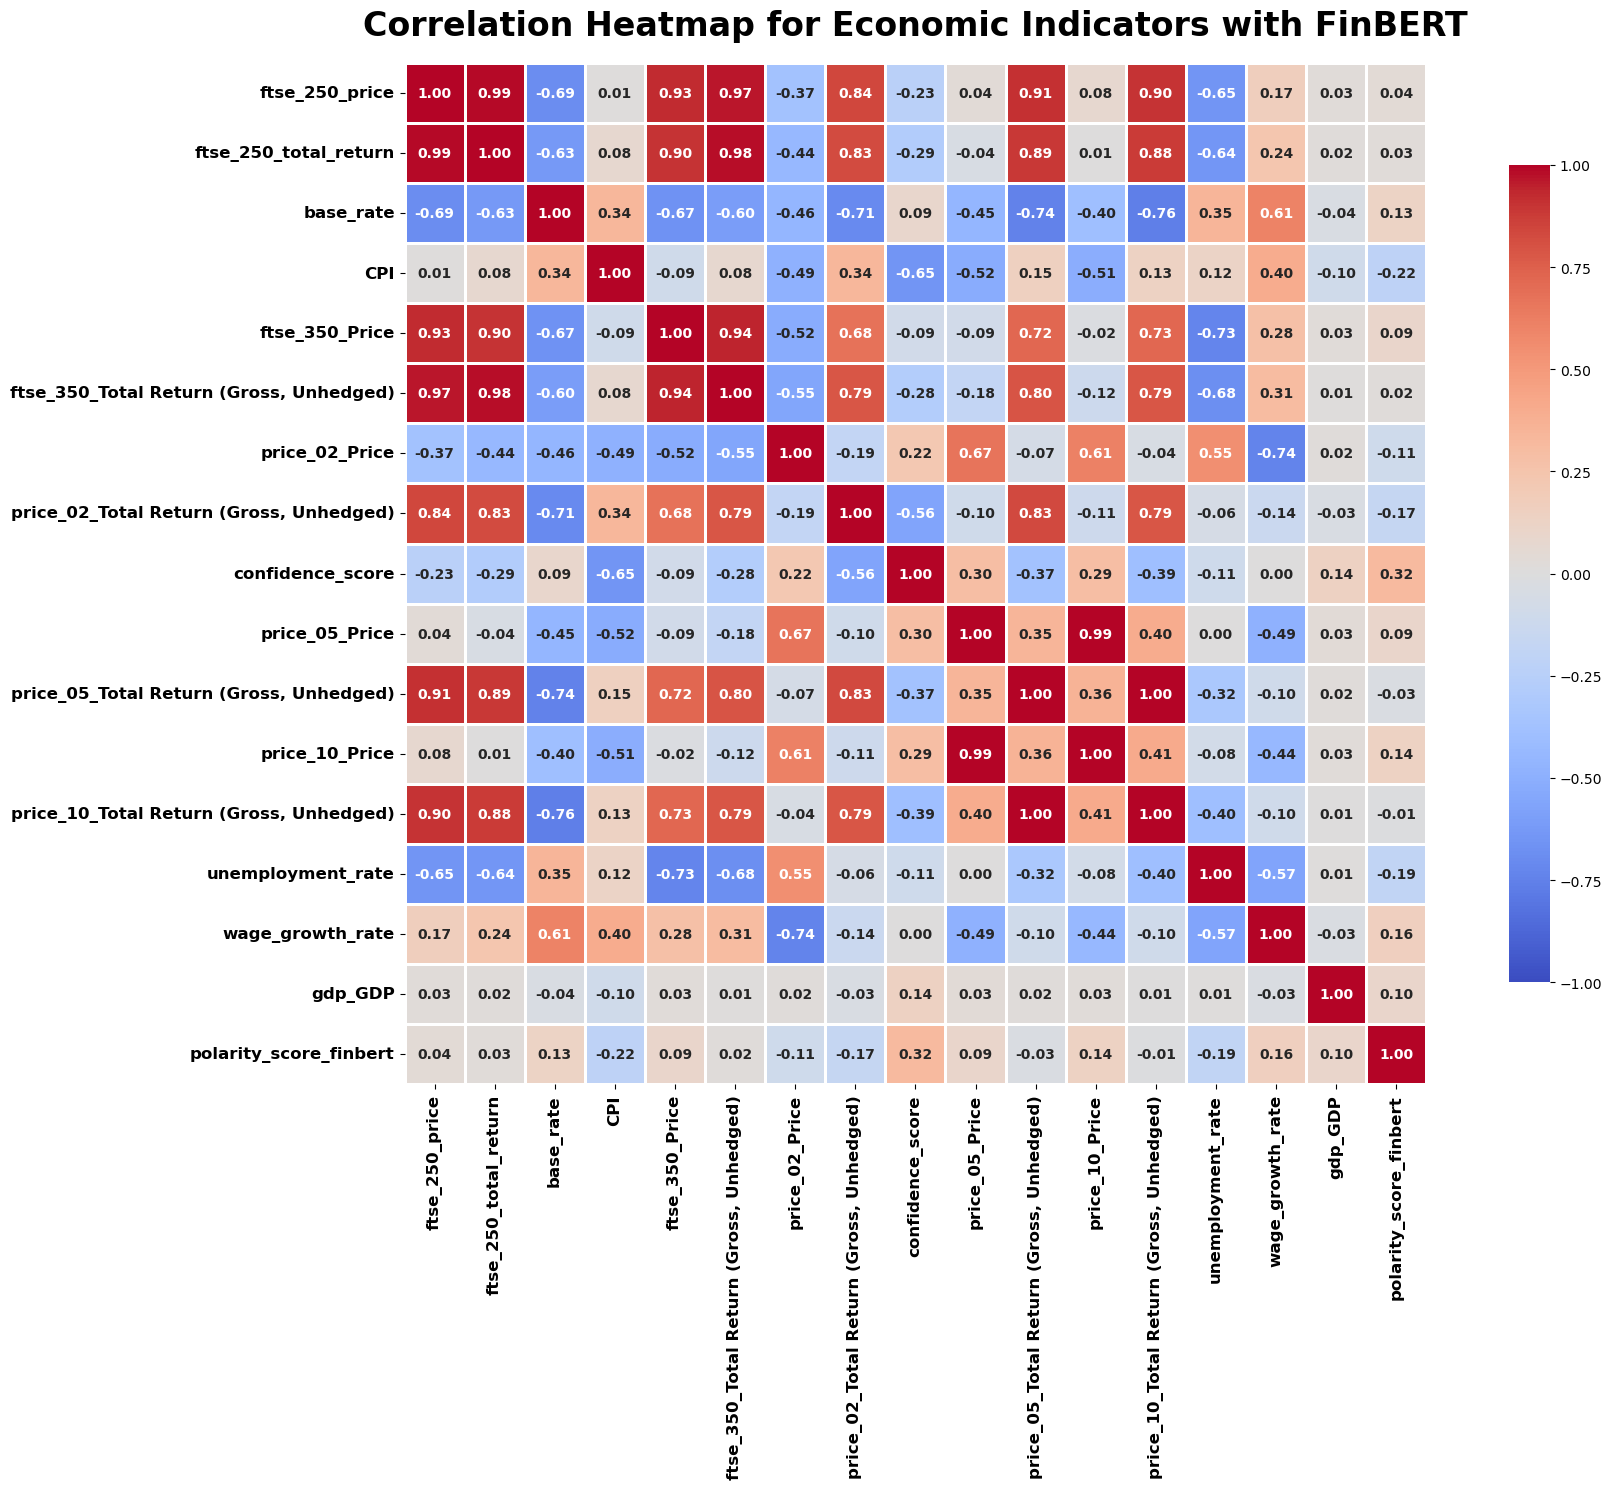

In [59]:
# Calculate the correlation matrix
correlation_matrix = merged_sentiment.select_dtypes(include='number').corr()

# Plot heatmap with improved styling
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 10, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)
plt.title('Correlation Heatmap for Economic Indicators with FinBERT', fontsize=24, fontweight='bold', pad=20)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

# Save the figure
heatmap_figure_path = "correlation_heatmap_sentiment.png"
#plt.savefig(heatmap_figure_path, dpi=300, bbox_inches='tight')

print(f"Improved heatmap saved as '{heatmap_figure_path}'")
plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\1666152044.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'])


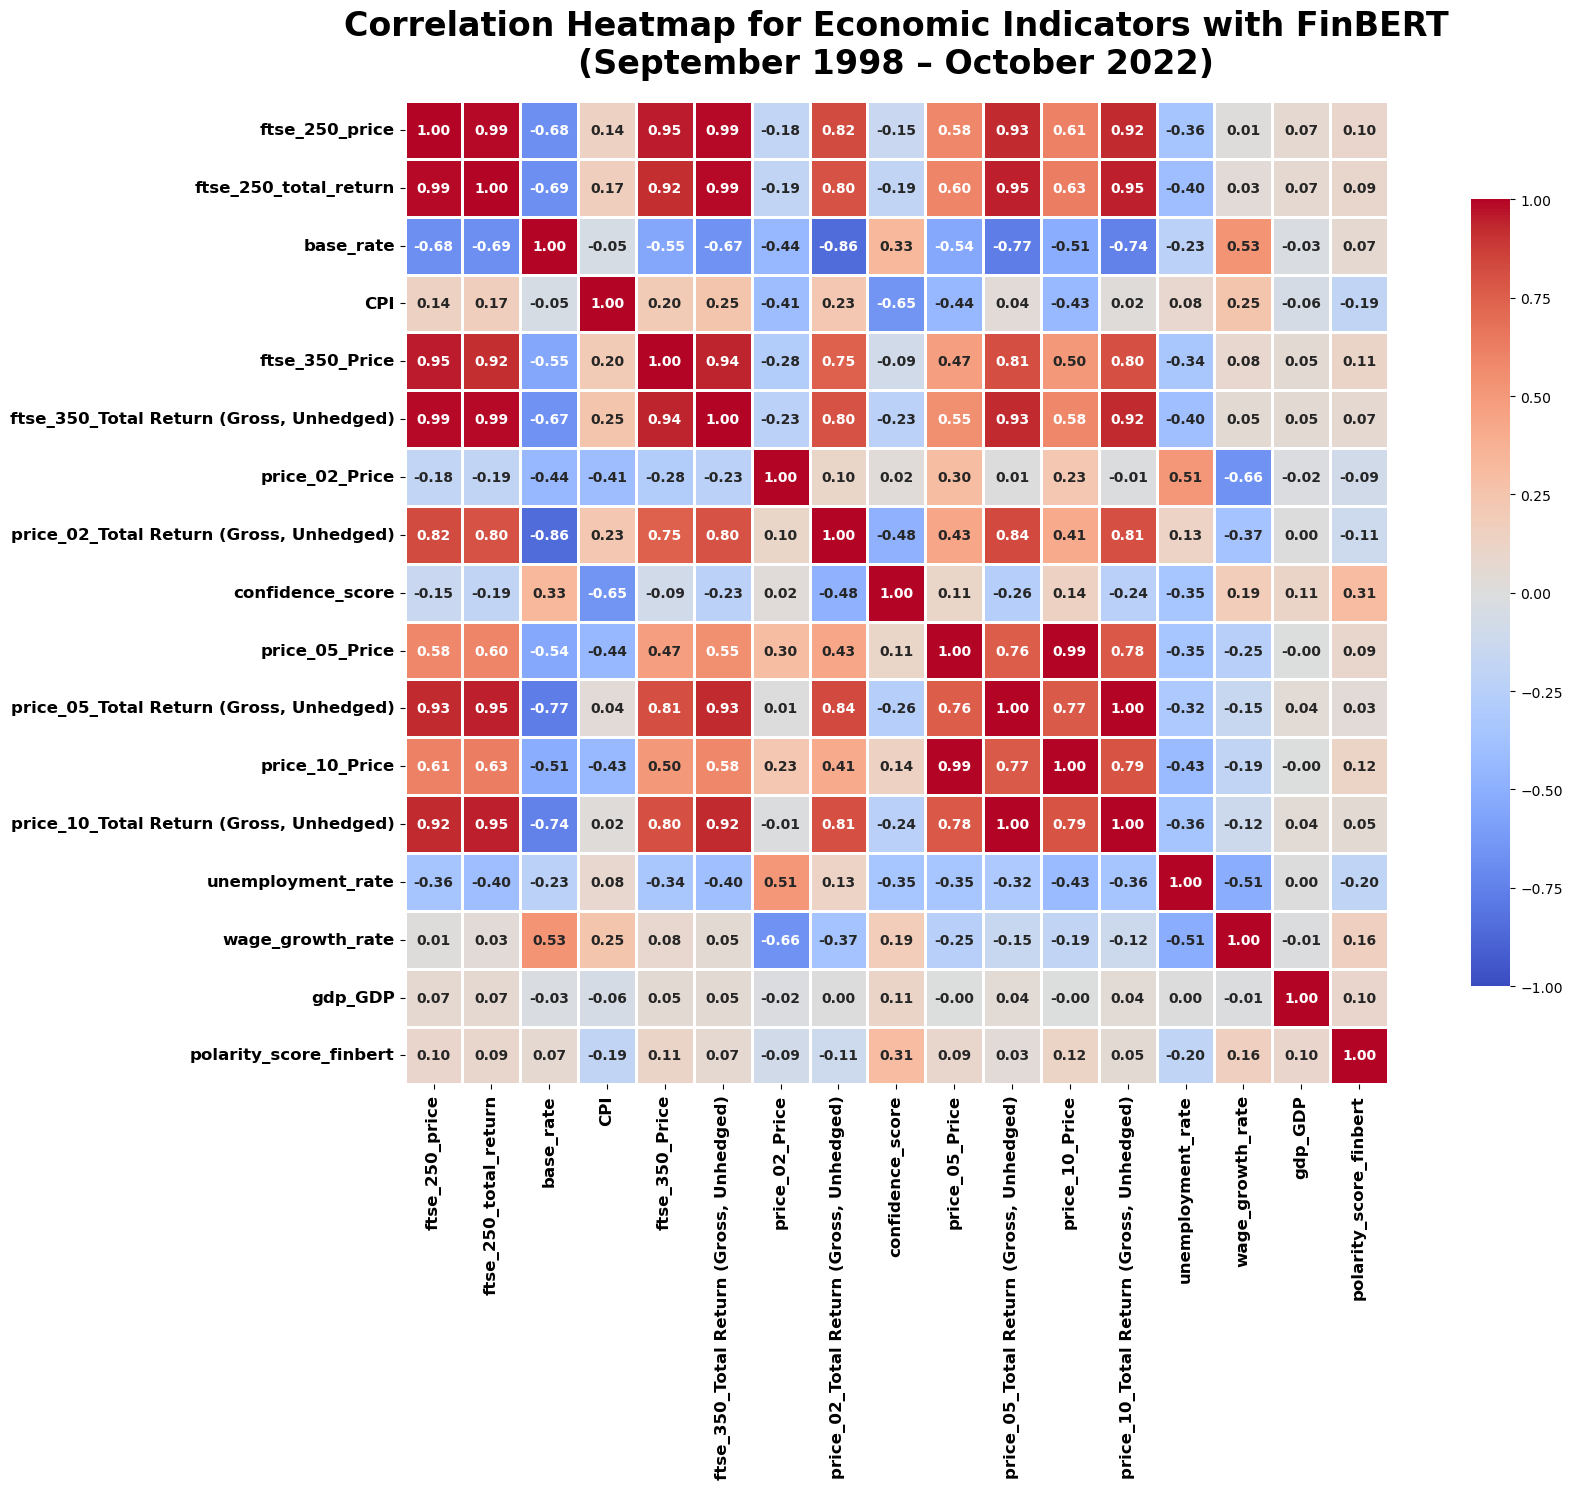

In [61]:
# Ensure 'Date' column is datetime
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'])
# If your date format is DD-MM-YYYY or DD-MM-YY, adjust as needed
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], format='%d-%m-%y', errors='coerce')

# Filter the DataFrame to 09/1998 – 10/2022
start_date = "1998-09-01"
end_date = "2022-10-01"
filtered_df = merged_sentiment[(merged_sentiment['Date'] >= start_date) & (merged_sentiment['Date'] <= end_date)]

# Select only numeric columns and drop rows with missing values
numeric_data = filtered_df.select_dtypes(include='number').dropna()

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 10, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)

plt.title('Correlation Heatmap for Economic Indicators with FinBERT\n(September 1998 – October 2022)', 
          fontsize=24, fontweight='bold', pad=20)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

plt.show()

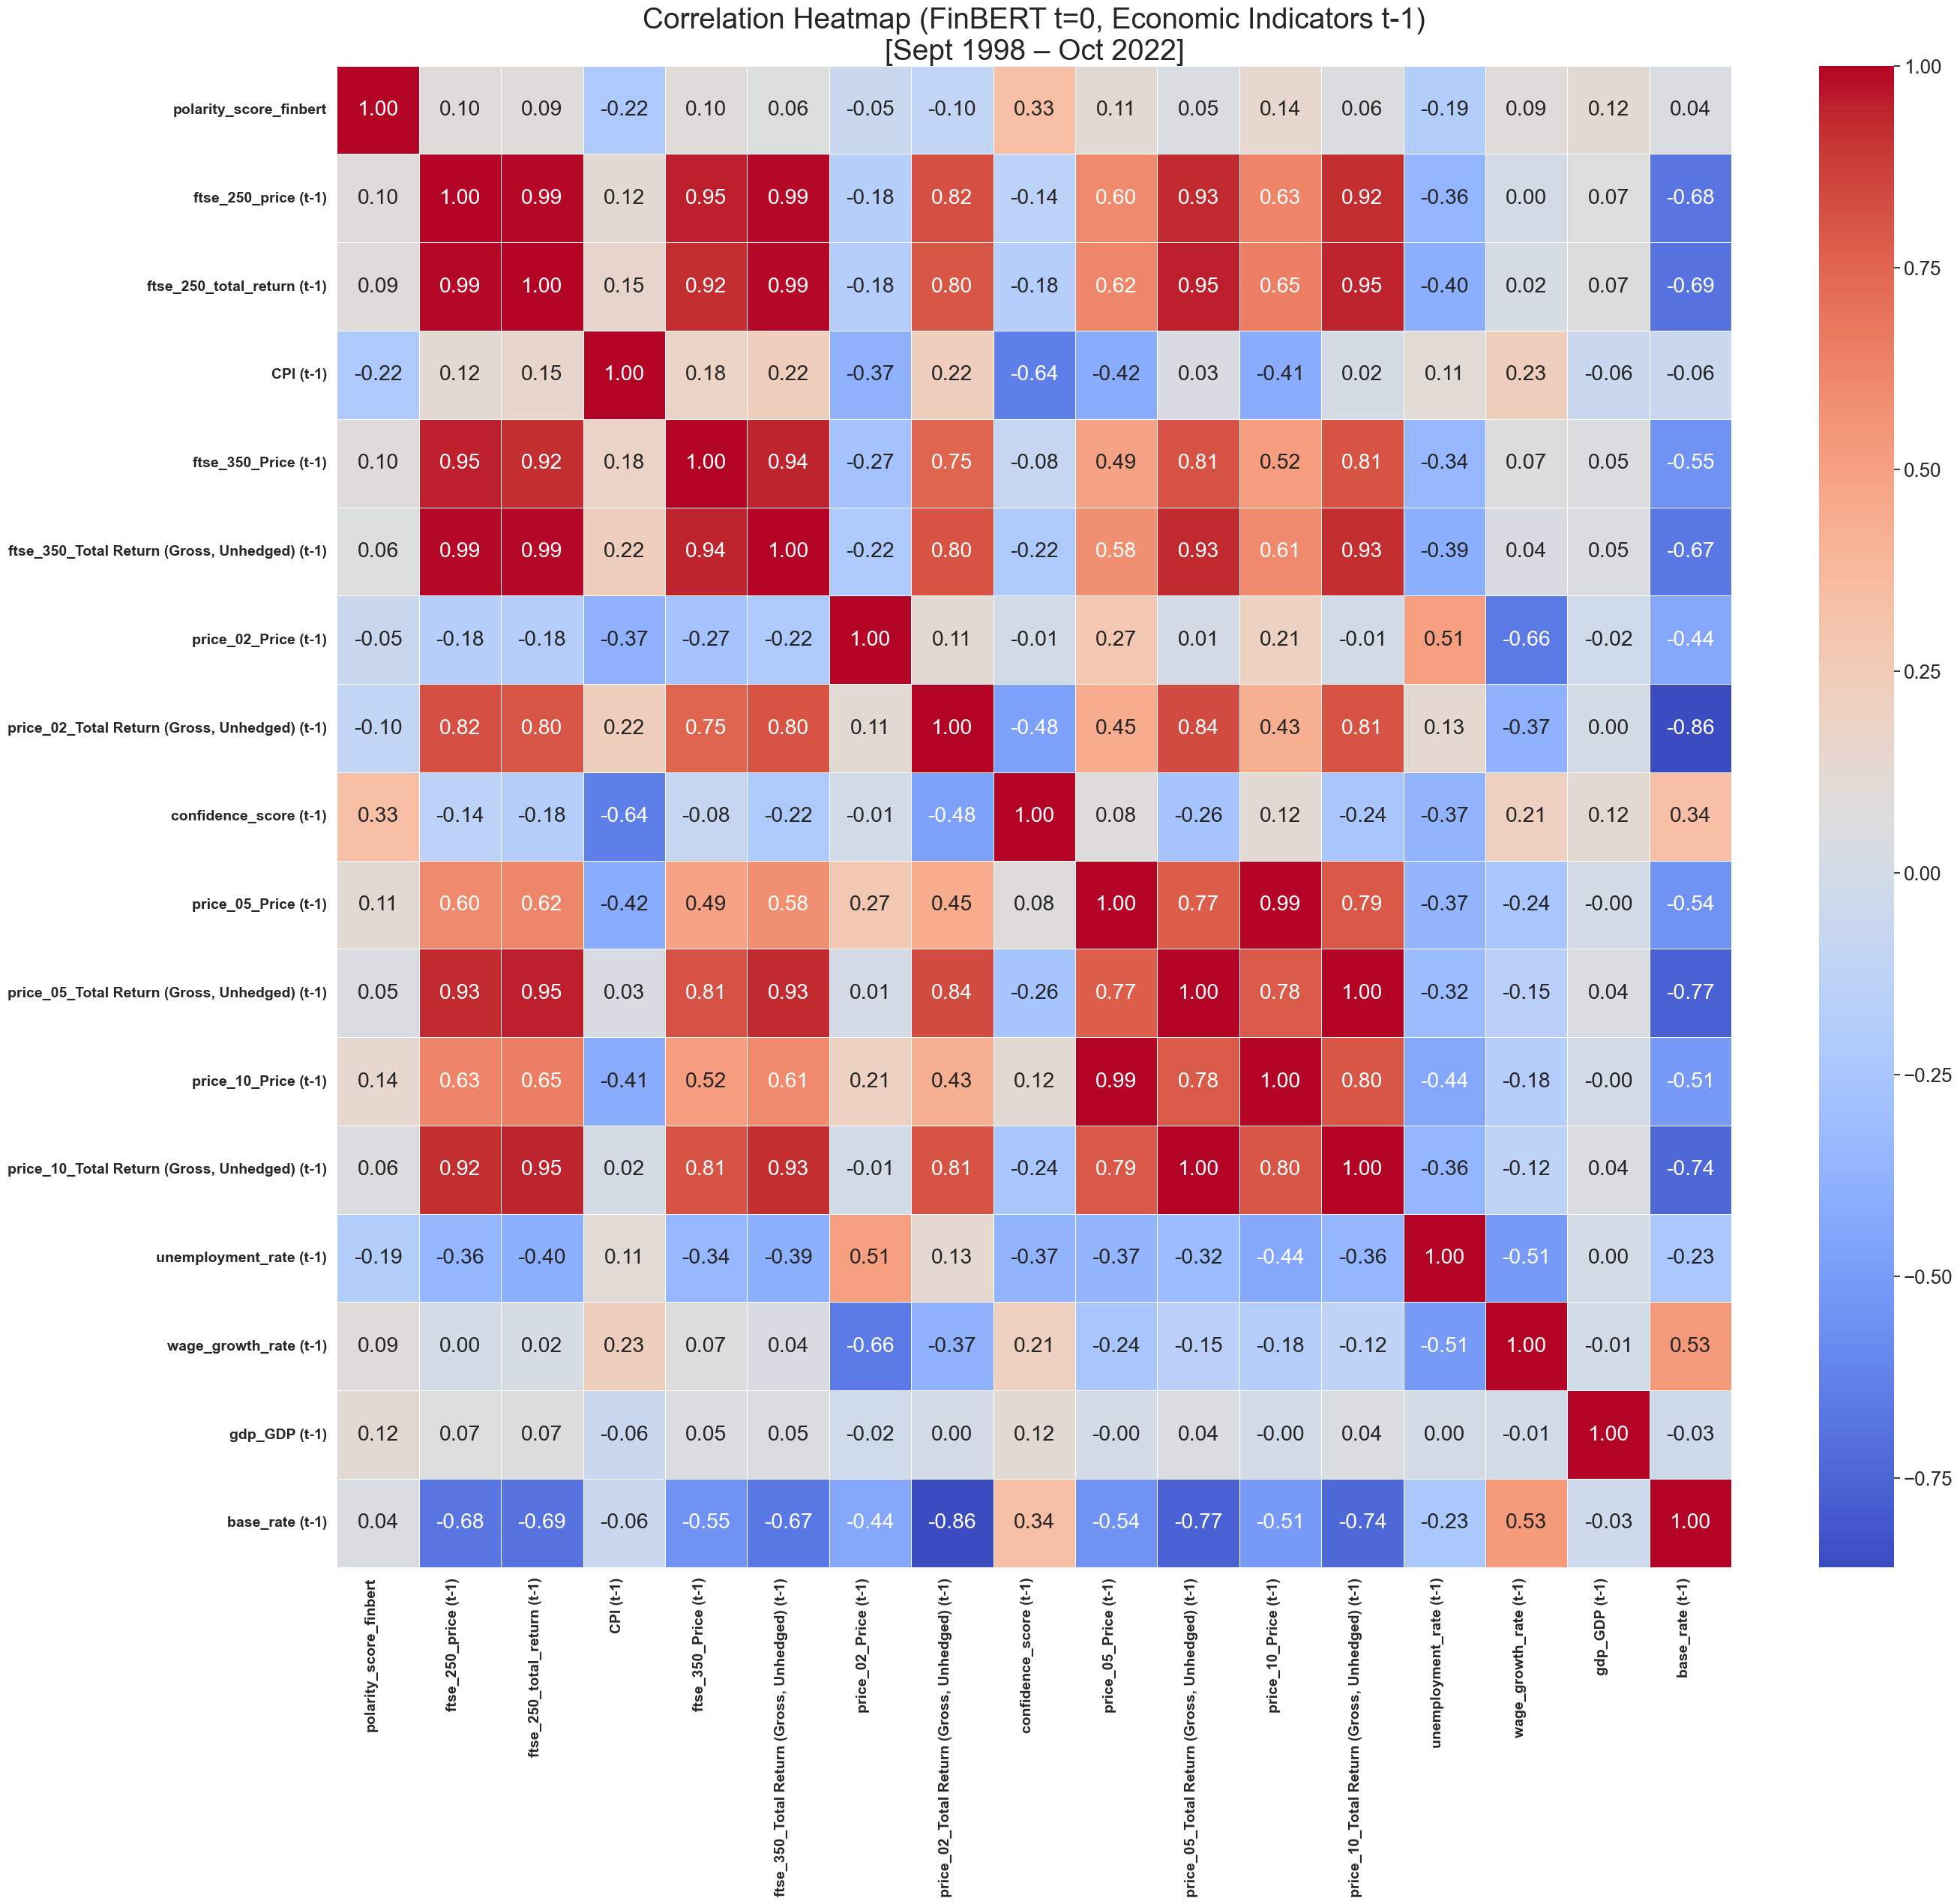

In [143]:
# Step 1: Parse date and filter timeframe
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment = merged_sentiment.dropna(subset=['Date'])  # Drop rows with invalid dates

# Filter: from September 1998 to October 2022
start_date = "1998-09-01"
end_date = "2022-10-01"
filtered_df = merged_sentiment[(merged_sentiment['Date'] >= start_date) & (merged_sentiment['Date'] <= end_date)].copy()

# Step 2: Define columns of interest
columns_of_interest = [
    'ftse_250_price', 'ftse_250_total_return', 'CPI', 'ftse_350_Price',
    'ftse_350_Total Return (Gross, Unhedged)', 'price_02_Price', 'price_02_Total Return (Gross, Unhedged)',
    'confidence_score', 'price_05_Price', 'price_05_Total Return (Gross, Unhedged)',
    'price_10_Price', 'price_10_Total Return (Gross, Unhedged)',
    'unemployment_rate', 'wage_growth_rate', 'gdp_GDP', 'base_rate'
]

# Step 3: Create correlation DataFrame
correlation_df = filtered_df[['polarity_score_finbert']].copy()  # FinBERT score at time t

# Step 4: Add t-1 (1 month lag) for all other indicators
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t-1)"] = filtered_df[col].shift(1)

# Step 5: Drop missing values from lagging
correlation_df.dropna(inplace=True)

# Step 6: Compute correlation matrix
correlation_matrix = correlation_df.corr()

# Step 7: Plot the heatmap
plt.figure(figsize=(30, 26))
sns.set(font_scale=1.7)
heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor='white'
)
plt.title("Correlation Heatmap (FinBERT t=0, Economic Indicators t-1)\n[Sept 1998 – Oct 2022]", fontsize=28)
plt.xticks(fontsize=14, weight='bold', ha='right')
plt.yticks(fontsize=14, weight='bold', rotation=0)
plt.show()

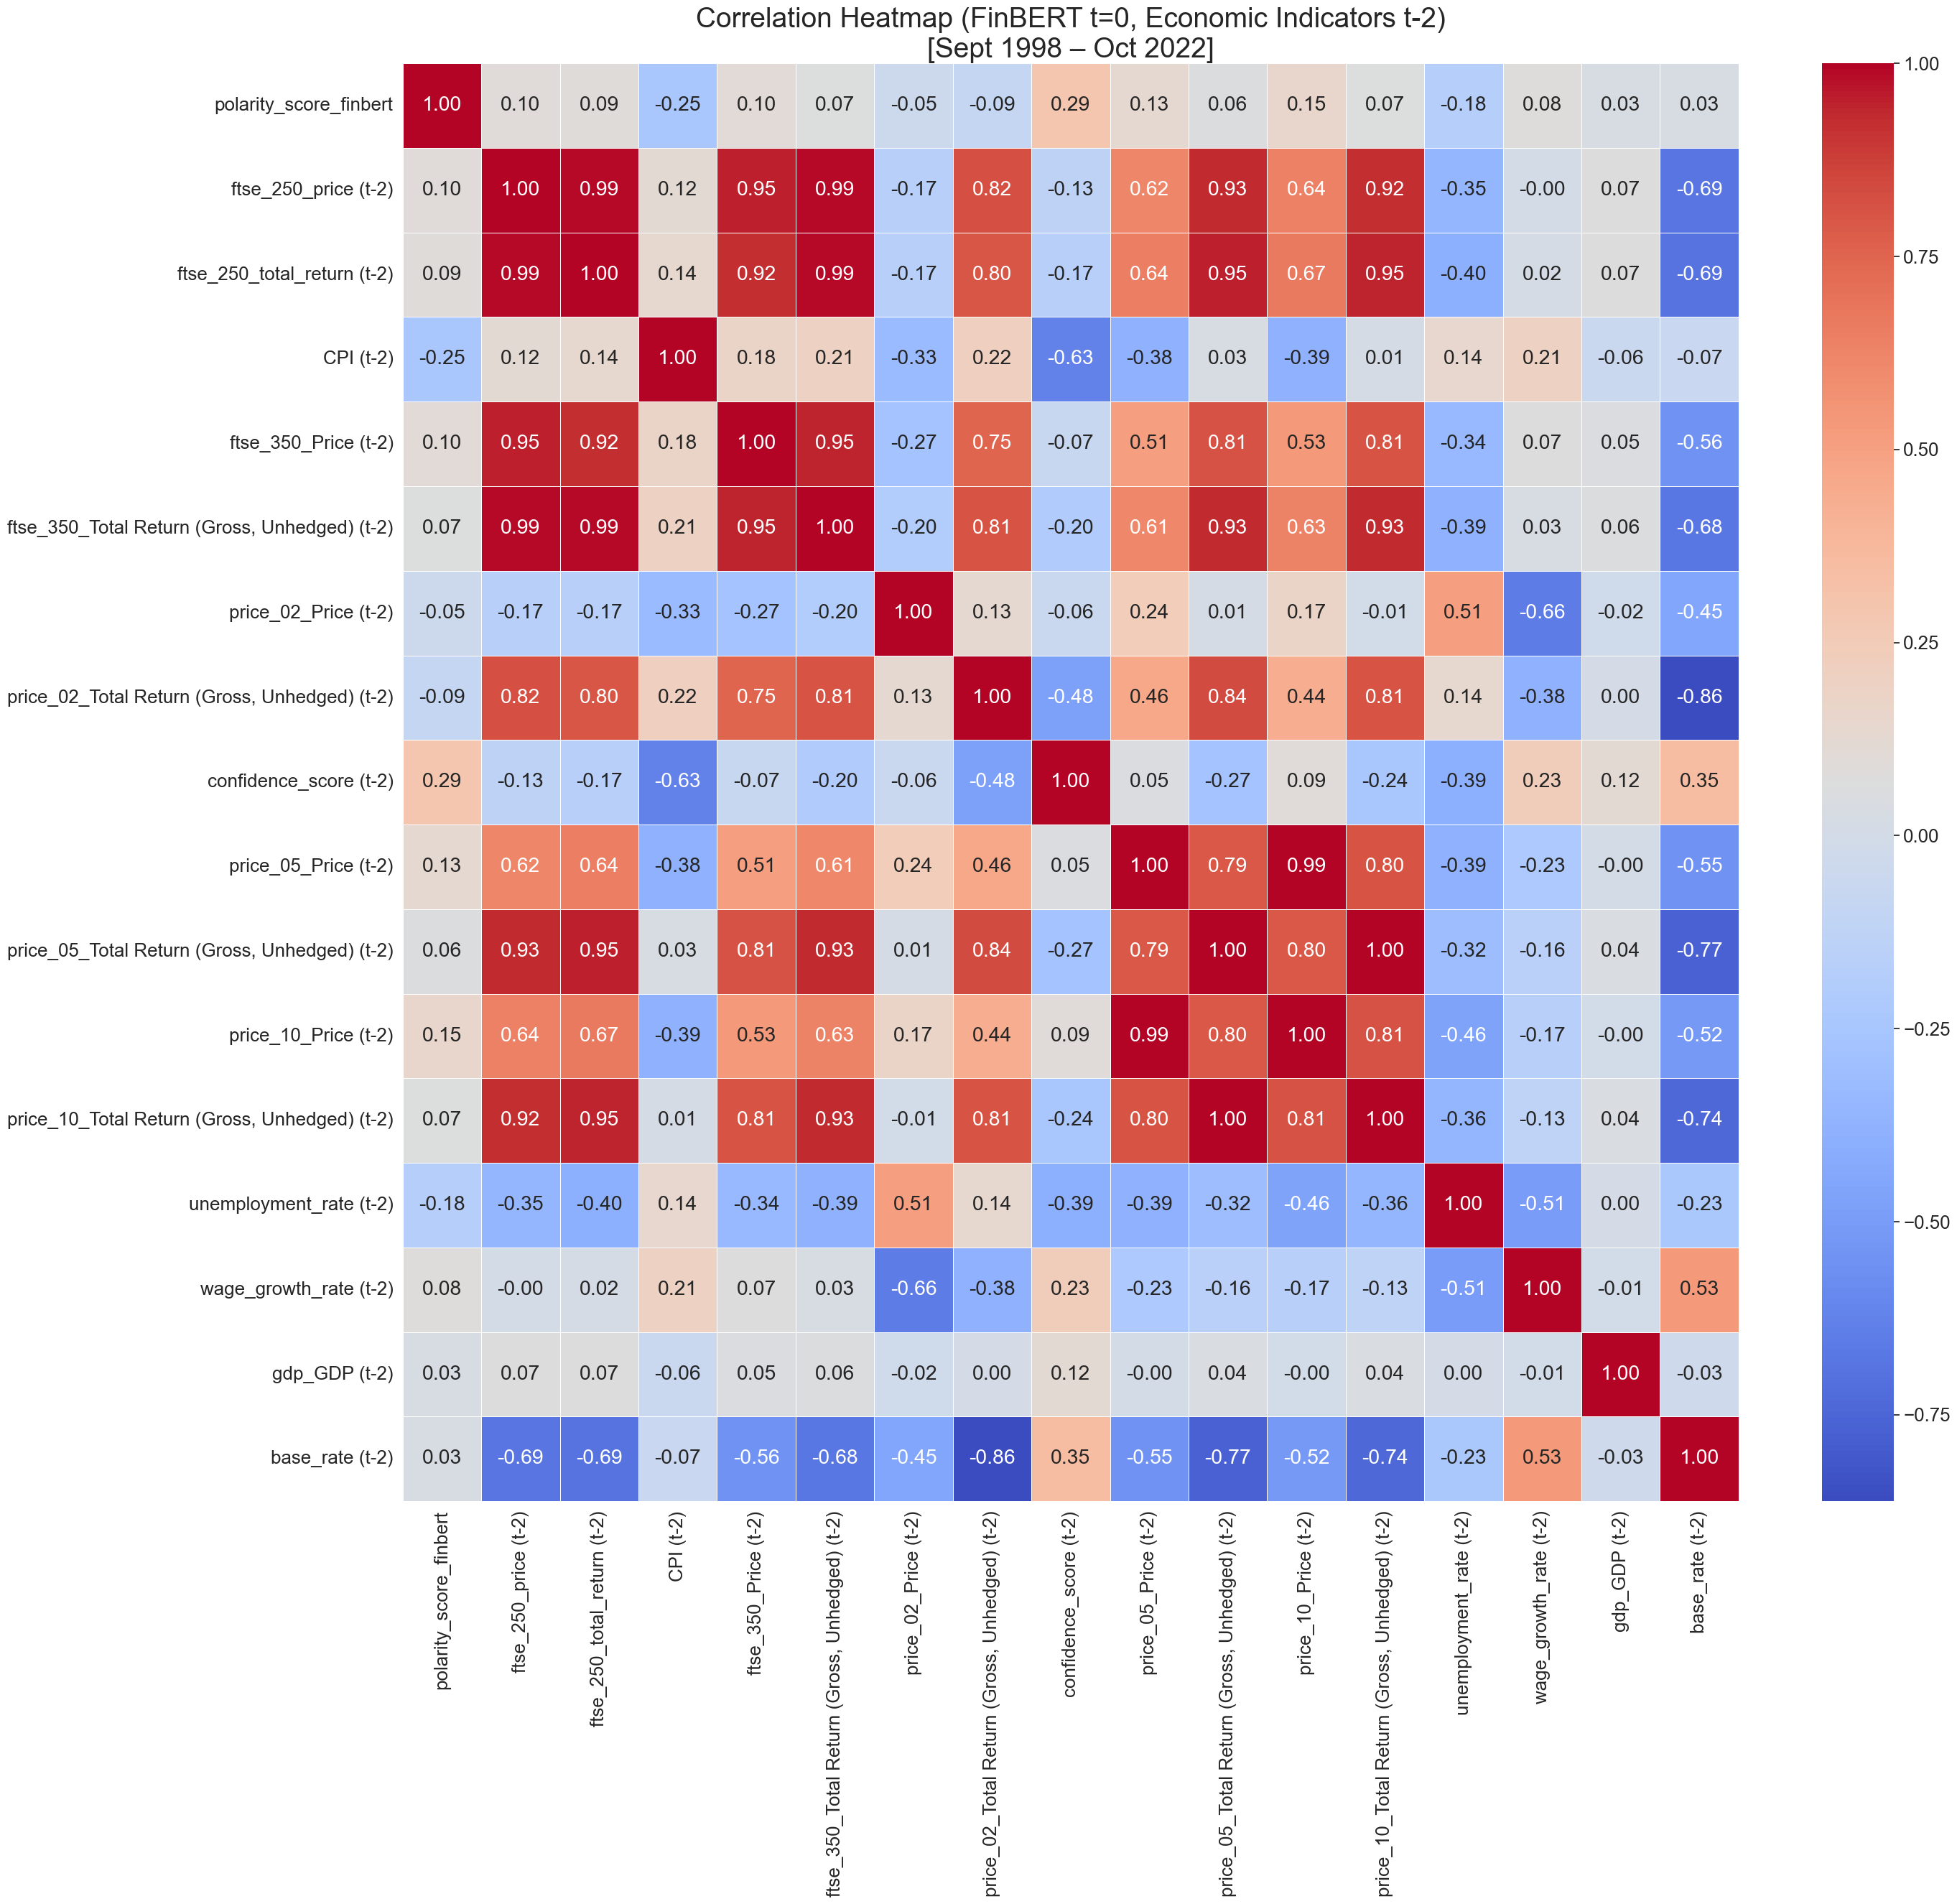

In [129]:
# Step 1: Parse date and filter timeframe
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment = merged_sentiment.dropna(subset=['Date'])

# Filter: from September 1998 to October 2022
start_date = "1998-09-01"
end_date = "2022-10-01"
filtered_df = merged_sentiment[(merged_sentiment['Date'] >= start_date) & (merged_sentiment['Date'] <= end_date)].copy()

# Step 2: Define columns of interest
columns_of_interest = [
    'ftse_250_price', 'ftse_250_total_return', 'CPI', 'ftse_350_Price',
    'ftse_350_Total Return (Gross, Unhedged)', 'price_02_Price', 'price_02_Total Return (Gross, Unhedged)',
    'confidence_score', 'price_05_Price', 'price_05_Total Return (Gross, Unhedged)',
    'price_10_Price', 'price_10_Total Return (Gross, Unhedged)',
    'unemployment_rate', 'wage_growth_rate', 'gdp_GDP', 'base_rate'
]

# Step 3: Create correlation DataFrame (FinBERT sentiment at time t)
correlation_df = filtered_df[['polarity_score_finbert']].copy()

# Step 4: Add t-2 (2-month lag) for all other indicators
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t-2)"] = filtered_df[col].shift(2)

# Step 5: Drop missing values due to lagging
correlation_df.dropna(inplace=True)

# Step 6: Compute correlation matrix
correlation_matrix = correlation_df.corr()

# Step 7: Plot heatmap
plt.figure(figsize=(30, 26))
sns.set(font_scale=1.7)
sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor='white'
)
plt.title("Correlation Heatmap (FinBERT t=0, Economic Indicators t-2)\n[Sept 1998 – Oct 2022]", fontsize=28)
plt.show()

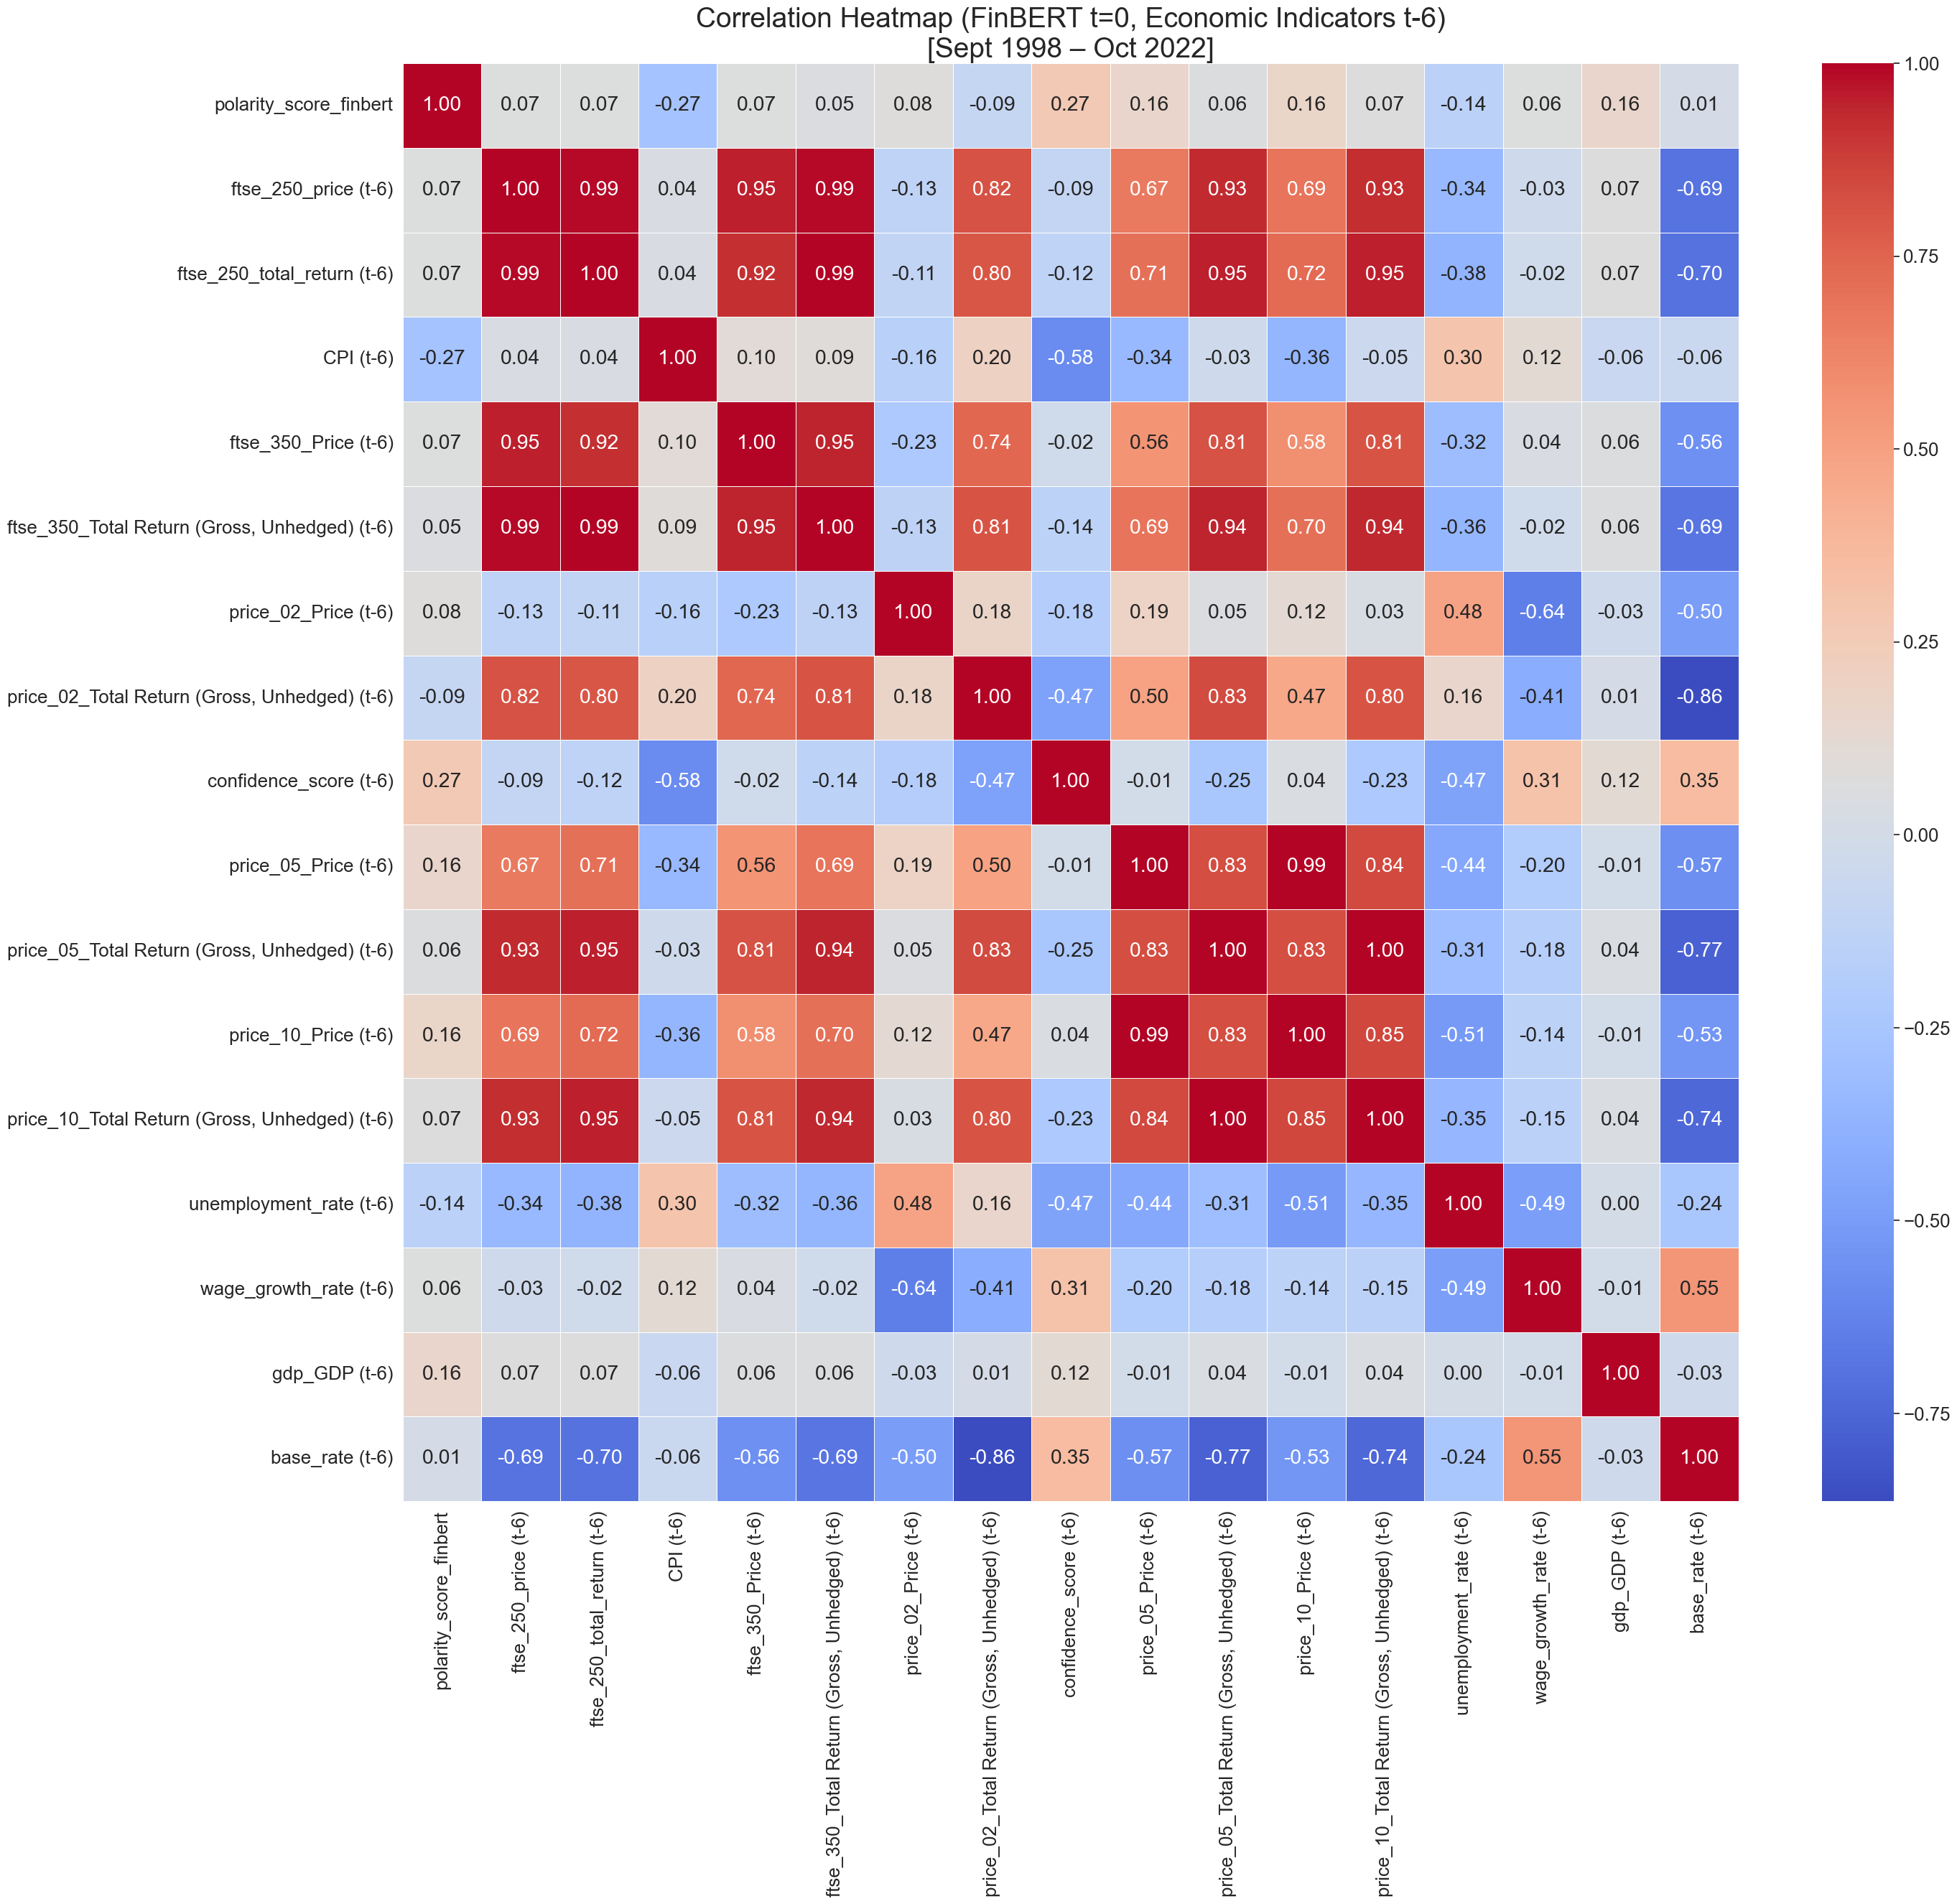

In [133]:
# Step 1: Parse date and filter timeframe
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment = merged_sentiment.dropna(subset=['Date'])

# Filter: from September 1998 to October 2022
start_date = "1998-09-01"
end_date = "2022-10-01"
filtered_df = merged_sentiment[(merged_sentiment['Date'] >= start_date) & (merged_sentiment['Date'] <= end_date)].copy()

# Step 2: Define columns of interest
columns_of_interest = [
    'ftse_250_price', 'ftse_250_total_return', 'CPI', 'ftse_350_Price',
    'ftse_350_Total Return (Gross, Unhedged)', 'price_02_Price', 'price_02_Total Return (Gross, Unhedged)',
    'confidence_score', 'price_05_Price', 'price_05_Total Return (Gross, Unhedged)',
    'price_10_Price', 'price_10_Total Return (Gross, Unhedged)',
    'unemployment_rate', 'wage_growth_rate', 'gdp_GDP', 'base_rate'
]

# Step 3: Create correlation DataFrame (FinBERT sentiment at time t)
correlation_df = filtered_df[['polarity_score_finbert']].copy()

# Step 4: Add t-6 (6-month lag) for all other indicators
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t-6)"] = filtered_df[col].shift(6)

# Step 5: Drop missing values due to lag
correlation_df.dropna(inplace=True)

# Step 6: Compute correlation matrix
correlation_matrix = correlation_df.corr()

# Step 7: Plot heatmap
plt.figure(figsize=(30, 26))
sns.set(font_scale=1.7)
sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor='white'
)
plt.title("Correlation Heatmap (FinBERT t=0, Economic Indicators t-6)\n[Sept 1998 – Oct 2022]", fontsize=28)
plt.show()

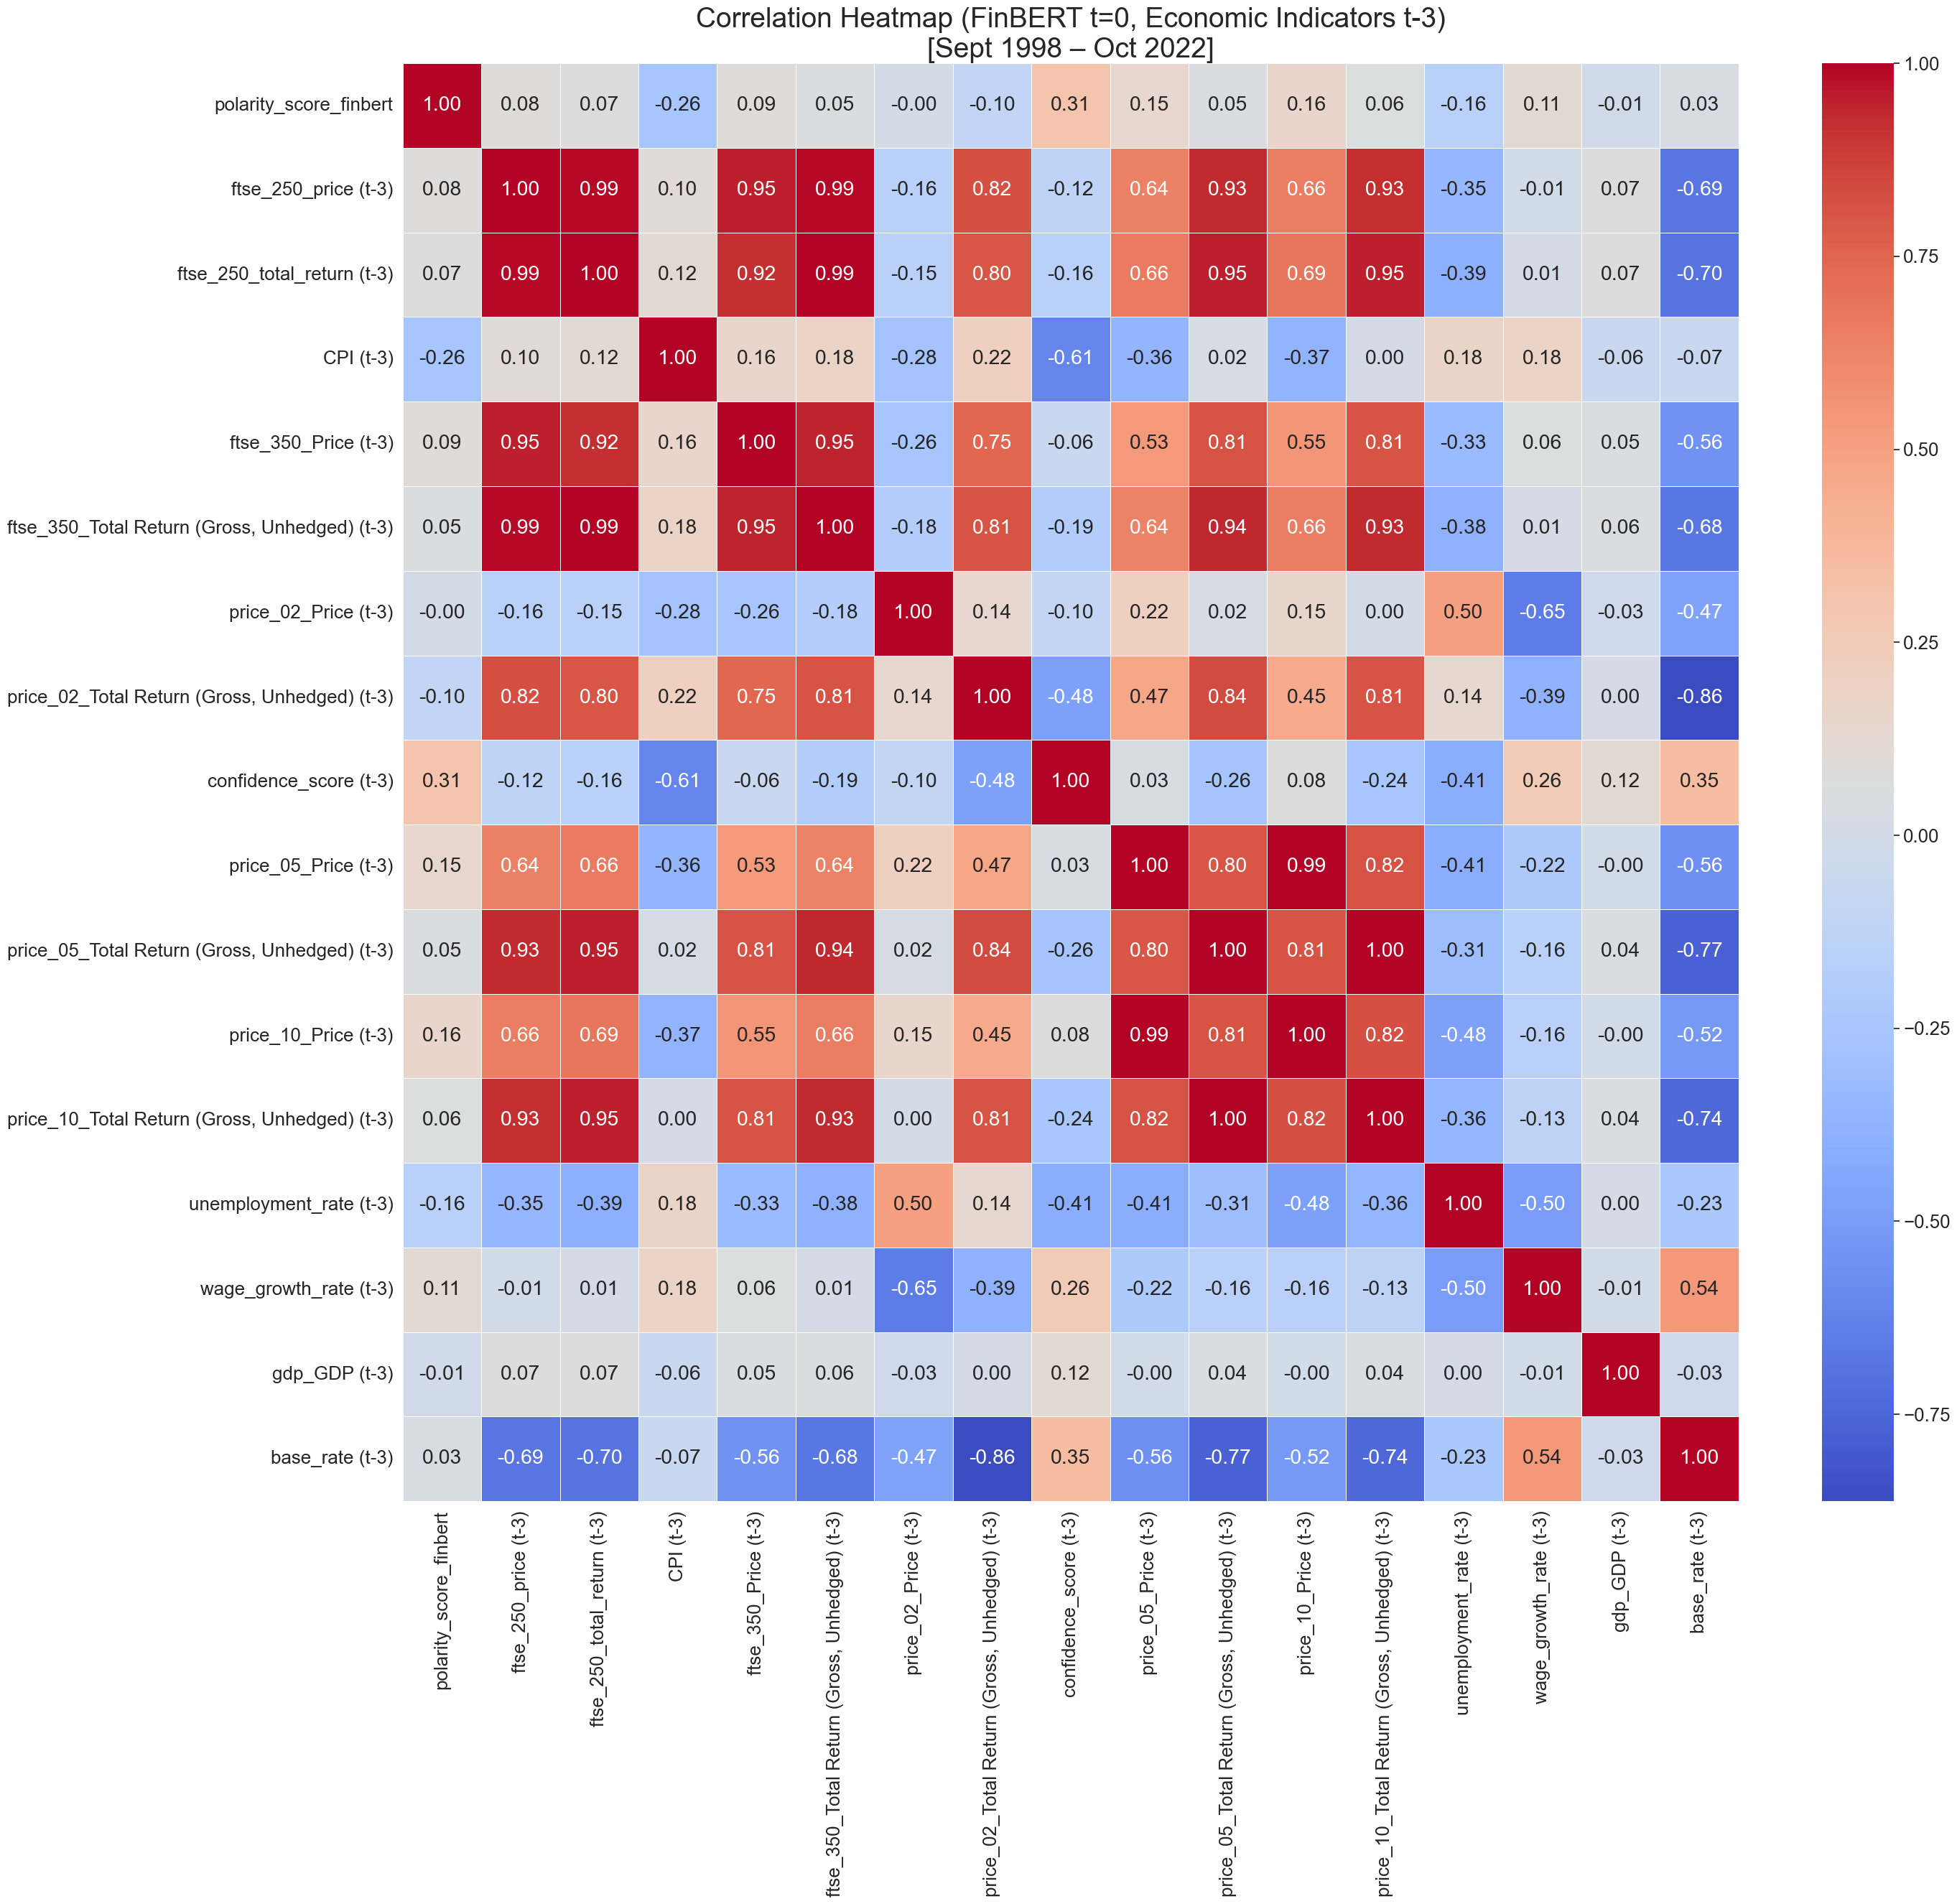

In [131]:
# Step 1: Parse date and filter timeframe
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment = merged_sentiment.dropna(subset=['Date'])

# Filter: from September 1998 to October 2022
start_date = "1998-09-01"
end_date = "2022-10-01"
filtered_df = merged_sentiment[(merged_sentiment['Date'] >= start_date) & (merged_sentiment['Date'] <= end_date)].copy()

# Step 2: Define columns of interest
columns_of_interest = [
    'ftse_250_price', 'ftse_250_total_return', 'CPI', 'ftse_350_Price',
    'ftse_350_Total Return (Gross, Unhedged)', 'price_02_Price', 'price_02_Total Return (Gross, Unhedged)',
    'confidence_score', 'price_05_Price', 'price_05_Total Return (Gross, Unhedged)',
    'price_10_Price', 'price_10_Total Return (Gross, Unhedged)',
    'unemployment_rate', 'wage_growth_rate', 'gdp_GDP', 'base_rate'
]

# Step 3: Create correlation DataFrame (FinBERT sentiment at time t)
correlation_df = filtered_df[['polarity_score_finbert']].copy()

# Step 4: Add t-3 (3-month lag) for all other indicators
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t-3)"] = filtered_df[col].shift(3)

# Step 5: Drop missing values due to lagging
correlation_df.dropna(inplace=True)

# Step 6: Compute correlation matrix
correlation_matrix = correlation_df.corr()

# Step 7: Plot heatmap
plt.figure(figsize=(30, 26))
sns.set(font_scale=1.7)
sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor='white'
)
plt.title("Correlation Heatmap (FinBERT t=0, Economic Indicators t-3)\n[Sept 1998 – Oct 2022]", fontsize=28)
plt.show()

In [63]:
merged_sentiment.columns

Index(['Date', 'ftse_250_price', 'ftse_250_total_return', 'base_rate', 'CPI',
       'ftse_350_Price', 'ftse_350_Total Return (Gross, Unhedged)',
       'price_02_Price', 'price_02_Total Return (Gross, Unhedged)',
       'confidence_score', 'price_05_Price',
       'price_05_Total Return (Gross, Unhedged)', 'price_10_Price',
       'price_10_Total Return (Gross, Unhedged)', 'unemployment_rate',
       'wage_growth_rate', 'gdp_GDP', 'polarity_score_finbert'],
      dtype='object')

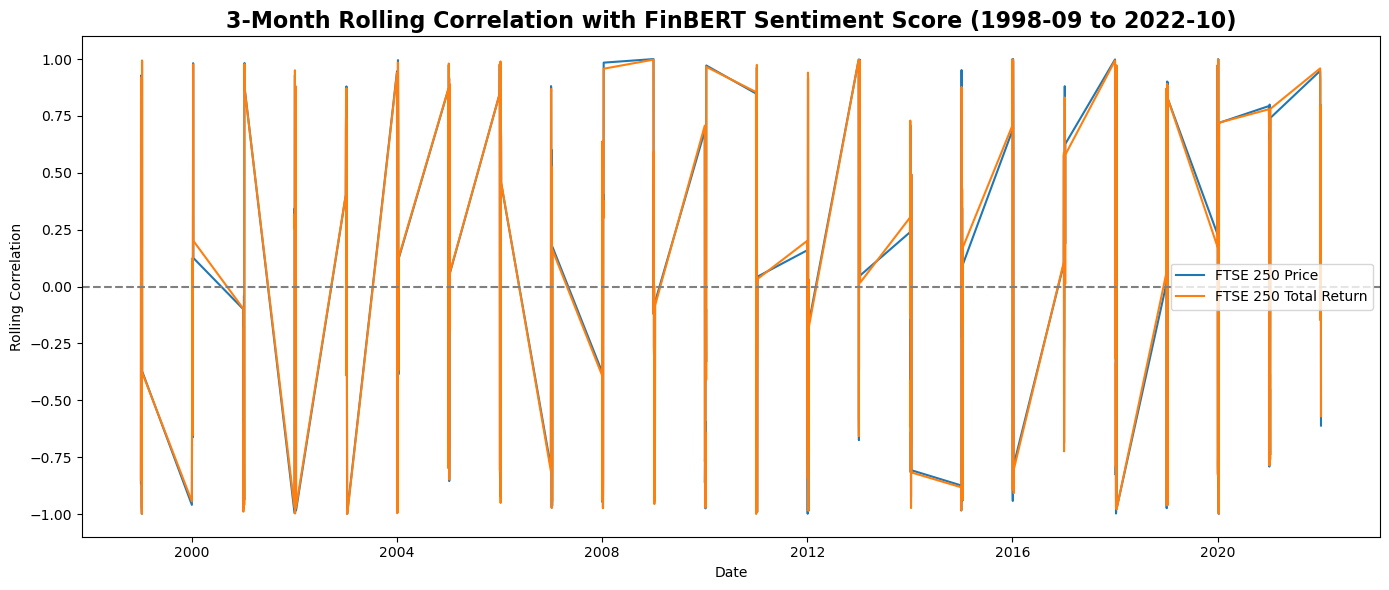

In [65]:
# --- Step 1: Clean and filter data ---
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment = merged_sentiment.dropna(subset=['Date'])
merged_sentiment = merged_sentiment.set_index('Date')
merged_sentiment = merged_sentiment.loc['1998-09-01':'2022-10-01']

# --- Step 2: Select only the relevant columns and interpolate ---
subset = merged_sentiment[['ftse_250_price', 'ftse_250_total_return', 'polarity_score_finbert']].copy()
subset.interpolate(method='linear', inplace=True)

# --- Step 3: Calculate rolling correlation (3 months) with sentiment ---
rolling_corr_df = subset.rolling(window=3).corr().reset_index()

# --- Step 4: Filter to show only correlations with the sentiment score ---
rolling_corr_df = rolling_corr_df[rolling_corr_df['level_1'] == 'polarity_score_finbert']
rolling_corr_df.rename(columns={'level_0': 'Date', 'level_1': 'Reference'}, inplace=True)

# --- Step 5: Plot ---
plt.figure(figsize=(14, 6))
sns.lineplot(data=rolling_corr_df, x='Date', y='ftse_250_price', label='FTSE 250 Price')
sns.lineplot(data=rolling_corr_df, x='Date', y='ftse_250_total_return', label='FTSE 250 Total Return')
plt.axhline(0, color='gray', linestyle='--')
plt.title('3-Month Rolling Correlation with FinBERT Sentiment Score (1998-09 to 2022-10)', fontsize=16, weight='bold')
plt.ylabel('Rolling Correlation')
plt.xlabel('Date')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\3866520999.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')


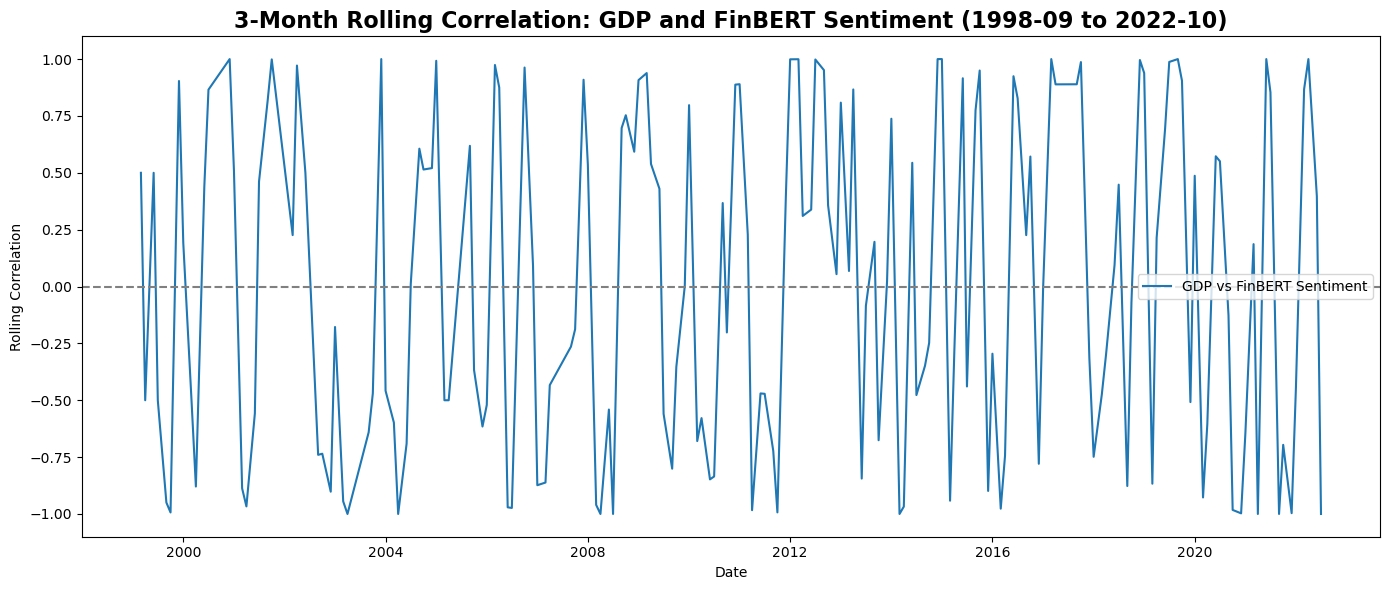

In [71]:
# --- Step 1: Ensure Date is datetime and filter the timeframe ---
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment = merged_sentiment.dropna(subset=['Date'])
merged_sentiment = merged_sentiment.set_index('Date')
merged_sentiment = merged_sentiment.loc['1998-09-01':'2022-10-01']

# --- Step 2: Select GDP and sentiment columns ---
gdp_df = merged_sentiment[['gdp_GDP', 'polarity_score_finbert']].copy()

# Interpolate missing values for both columns
gdp_df.interpolate(method='linear', inplace=True)

# --- Step 3: Rolling correlation ---
rolling_corr_gdp = gdp_df.rolling(window=3).corr().reset_index()

# Filter to only keep correlation of gdp_GDP with sentiment
rolling_corr_gdp = rolling_corr_gdp[rolling_corr_gdp['level_1'] == 'polarity_score_finbert']
rolling_corr_gdp.rename(columns={'level_0': 'Date'}, inplace=True)

# --- Step 4: Plot ---
plt.figure(figsize=(14, 6))
sns.lineplot(data=rolling_corr_gdp, x='Date', y='gdp_GDP', label='GDP vs FinBERT Sentiment')
plt.axhline(0, color='gray', linestyle='--')
plt.title('3-Month Rolling Correlation: GDP and FinBERT Sentiment (1998-09 to 2022-10)', fontsize=16, weight='bold')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\2887659994.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\2887659994.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)


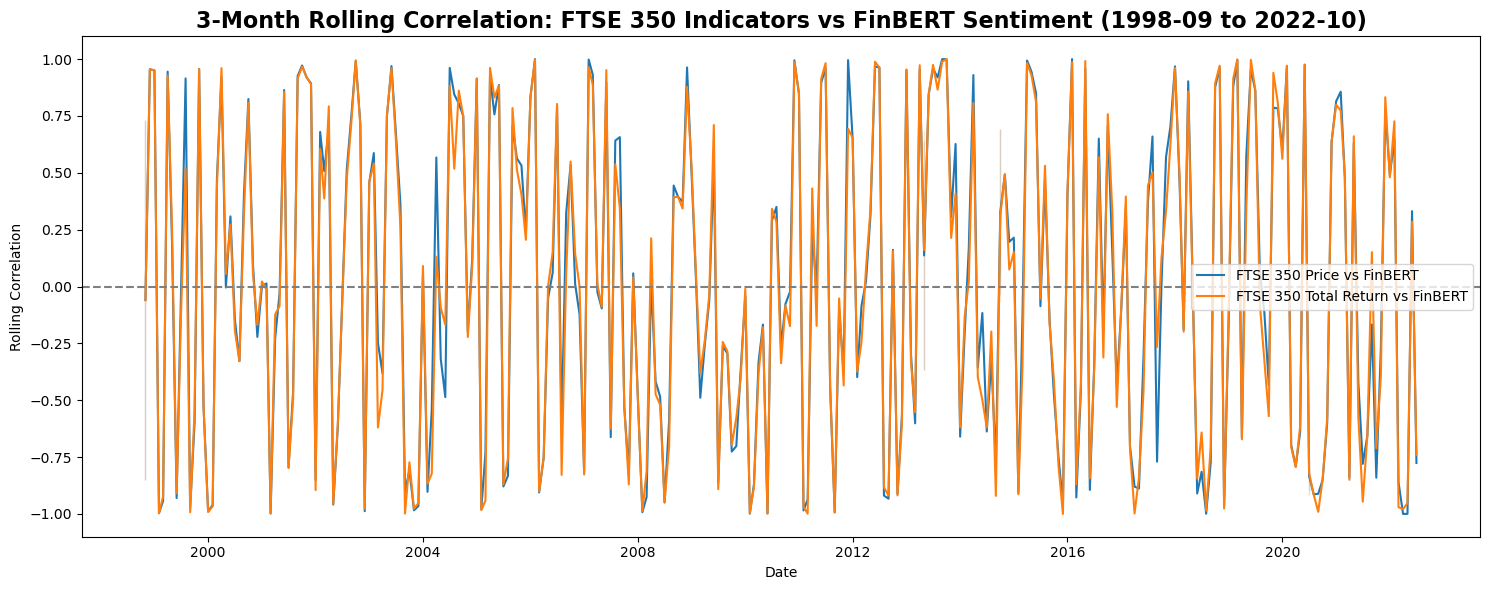

In [77]:
# --- Step 1: Prepare the data ---
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment = merged_sentiment.dropna(subset=['Date'])
merged_sentiment = merged_sentiment.set_index('Date')
merged_sentiment = merged_sentiment.loc['1998-09-01':'2022-10-01']

# --- Step 2: Select relevant columns ---
ftse_350_df = merged_sentiment[['ftse_350_Price', 'ftse_350_Total Return (Gross, Unhedged)', 'polarity_score_finbert']].copy()
ftse_350_df.interpolate(method='linear', inplace=True)

# --- Step 3: Compute 3-month rolling correlations ---
rolling_corr = ftse_350_df.rolling(window=3).corr().reset_index()

# --- Step 4: Filter only correlations with sentiment ---
filtered_corr = rolling_corr[rolling_corr['level_1'] == 'polarity_score_finbert']
filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)

# --- Step 5: Plot the correlations ---
plt.figure(figsize=(15, 6))
sns.lineplot(data=filtered_corr, x='Date', y='ftse_350_Price', label='FTSE 350 Price vs FinBERT')
sns.lineplot(data=filtered_corr, x='Date', y='ftse_350_Total Return (Gross, Unhedged)', label='FTSE 350 Total Return vs FinBERT')

plt.axhline(0, color='gray', linestyle='--')
plt.title('3-Month Rolling Correlation: FTSE 350 Indicators vs FinBERT Sentiment (1998-09 to 2022-10)', fontsize=16, weight='bold')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\812030851.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\812030851.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)


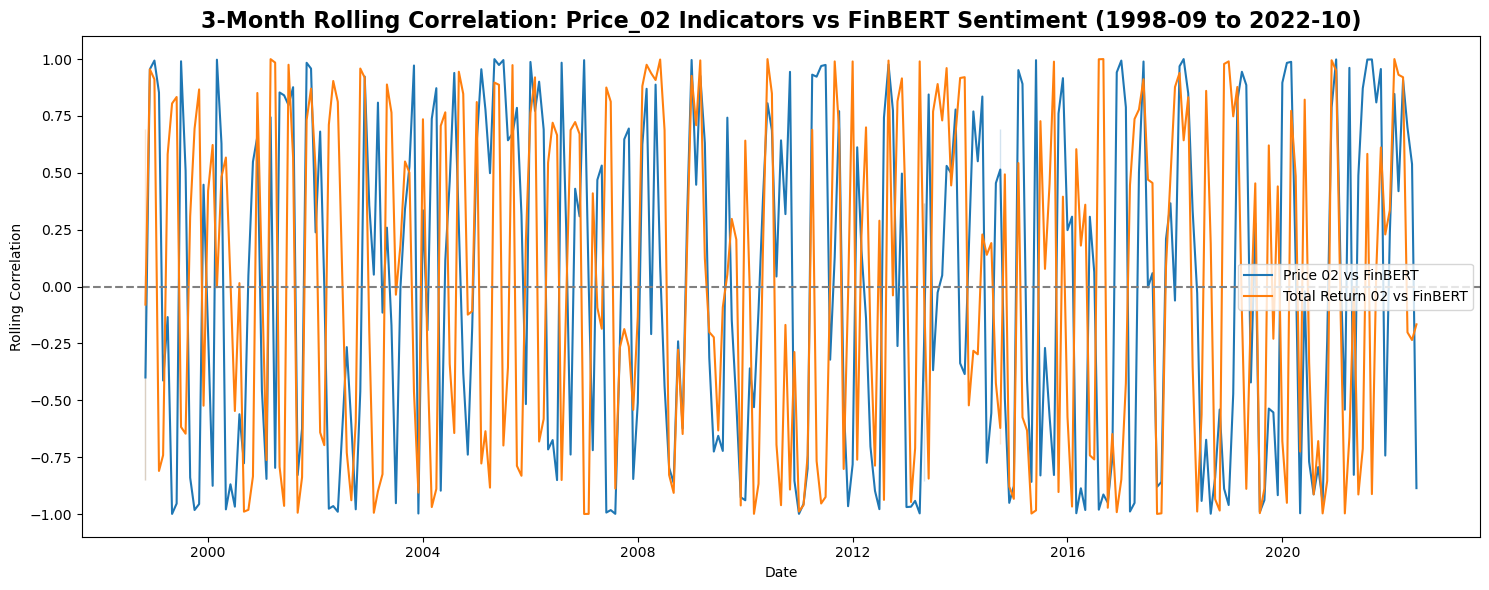

In [81]:
# --- Step 1: Prepare data ---
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment.dropna(subset=['Date'], inplace=True)
merged_sentiment.set_index('Date', inplace=True)
merged_sentiment = merged_sentiment.loc['1998-09-01':'2022-10-01']

# --- Step 2: Select relevant columns ---
price_02_df = merged_sentiment[['price_02_Price', 'price_02_Total Return (Gross, Unhedged)', 'polarity_score_finbert']].copy()
price_02_df.interpolate(method='linear', inplace=True)

# --- Step 3: Rolling correlation with sentiment ---
rolling_corr = price_02_df.rolling(window=3).corr().reset_index()

# --- Step 4: Filter only correlations with sentiment ---
filtered_corr = rolling_corr[rolling_corr['level_1'] == 'polarity_score_finbert']
filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)

# --- Step 5: Plot ---
plt.figure(figsize=(15, 6))
sns.lineplot(data=filtered_corr, x='Date', y='price_02_Price', label='Price 02 vs FinBERT')
sns.lineplot(data=filtered_corr, x='Date', y='price_02_Total Return (Gross, Unhedged)', label='Total Return 02 vs FinBERT')

plt.axhline(0, color='gray', linestyle='--')
plt.title('3-Month Rolling Correlation: Price_02 Indicators vs FinBERT Sentiment (1998-09 to 2022-10)', fontsize=16, weight='bold')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\51769555.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\51769555.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)


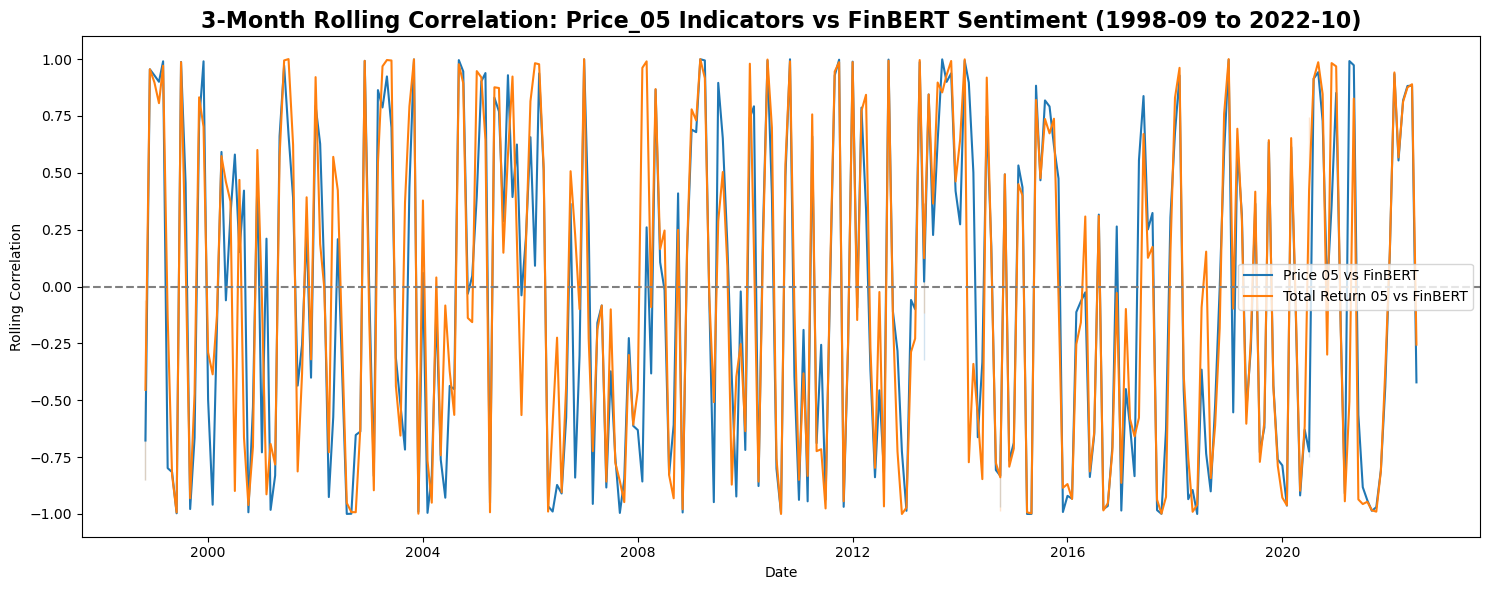

In [85]:
# --- Step 1: Prepare data ---
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment.dropna(subset=['Date'], inplace=True)
merged_sentiment.set_index('Date', inplace=True)
merged_sentiment = merged_sentiment.loc['1998-09-01':'2022-10-01']

# --- Step 2: Select relevant columns ---
price_05_df = merged_sentiment[['price_05_Price', 'price_05_Total Return (Gross, Unhedged)', 'polarity_score_finbert']].copy()
price_05_df.interpolate(method='linear', inplace=True)

# --- Step 3: Rolling correlation with sentiment ---
rolling_corr = price_05_df.rolling(window=3).corr().reset_index()

# --- Step 4: Filter only correlations with sentiment ---
filtered_corr = rolling_corr[rolling_corr['level_1'] == 'polarity_score_finbert']
filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)

# --- Step 5: Plot ---
plt.figure(figsize=(15, 6))
sns.lineplot(data=filtered_corr, x='Date', y='price_05_Price', label='Price 05 vs FinBERT')
sns.lineplot(data=filtered_corr, x='Date', y='price_05_Total Return (Gross, Unhedged)', label='Total Return 05 vs FinBERT')

plt.axhline(0, color='gray', linestyle='--')
plt.title('3-Month Rolling Correlation: Price_05 Indicators vs FinBERT Sentiment (1998-09 to 2022-10)', fontsize=16, weight='bold')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\3308552683.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\3308552683.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)


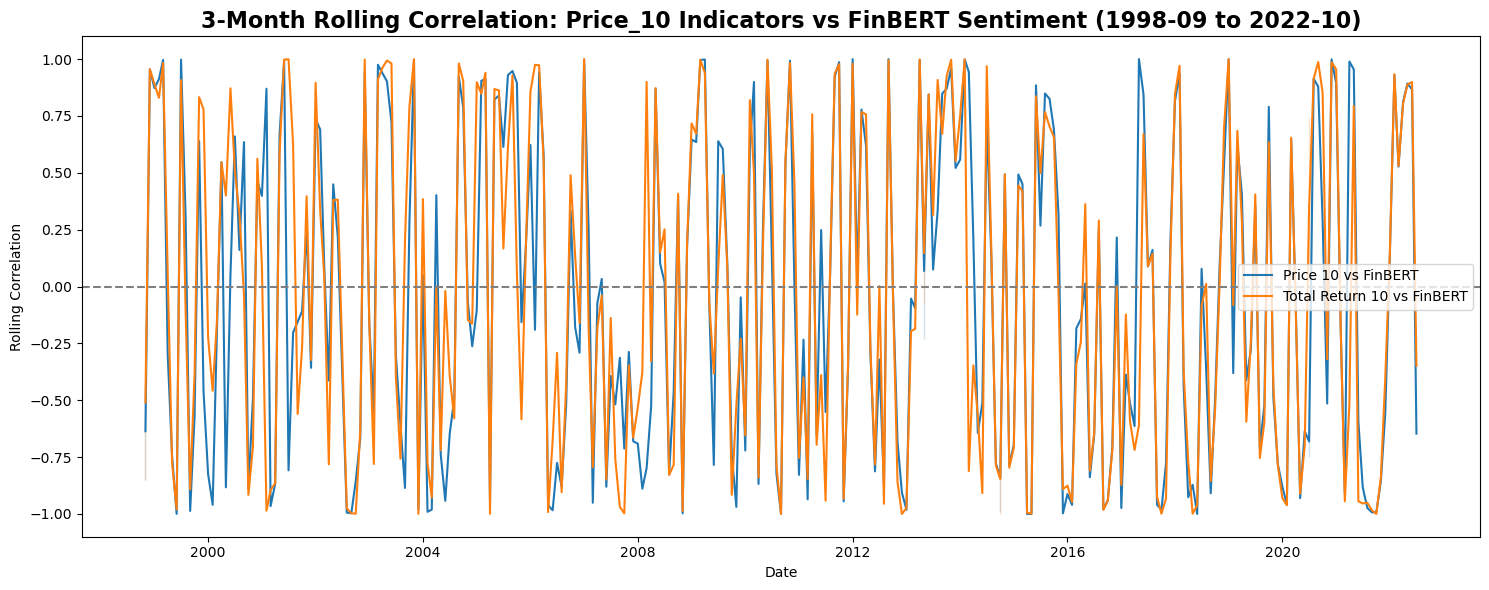

In [89]:
# --- Step 1: Prepare data ---
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment.dropna(subset=['Date'], inplace=True)
merged_sentiment.set_index('Date', inplace=True)
merged_sentiment = merged_sentiment.loc['1998-09-01':'2022-10-01']

# --- Step 2: Select relevant columns ---
price_10_df = merged_sentiment[['price_10_Price', 'price_10_Total Return (Gross, Unhedged)', 'polarity_score_finbert']].copy()
price_10_df.interpolate(method='linear', inplace=True)

# --- Step 3: Rolling correlation with sentiment ---
rolling_corr = price_10_df.rolling(window=3).corr().reset_index()

# --- Step 4: Filter only correlations with sentiment ---
filtered_corr = rolling_corr[rolling_corr['level_1'] == 'polarity_score_finbert']
filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)

# --- Step 5: Plot ---
plt.figure(figsize=(15, 6))
sns.lineplot(data=filtered_corr, x='Date', y='price_10_Price', label='Price 10 vs FinBERT')
sns.lineplot(data=filtered_corr, x='Date', y='price_10_Total Return (Gross, Unhedged)', label='Total Return 10 vs FinBERT')

plt.axhline(0, color='gray', linestyle='--')
plt.title('3-Month Rolling Correlation: Price_10 Indicators vs FinBERT Sentiment (1998-09 to 2022-10)', fontsize=16, weight='bold')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\4213514416.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\4213514416.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)


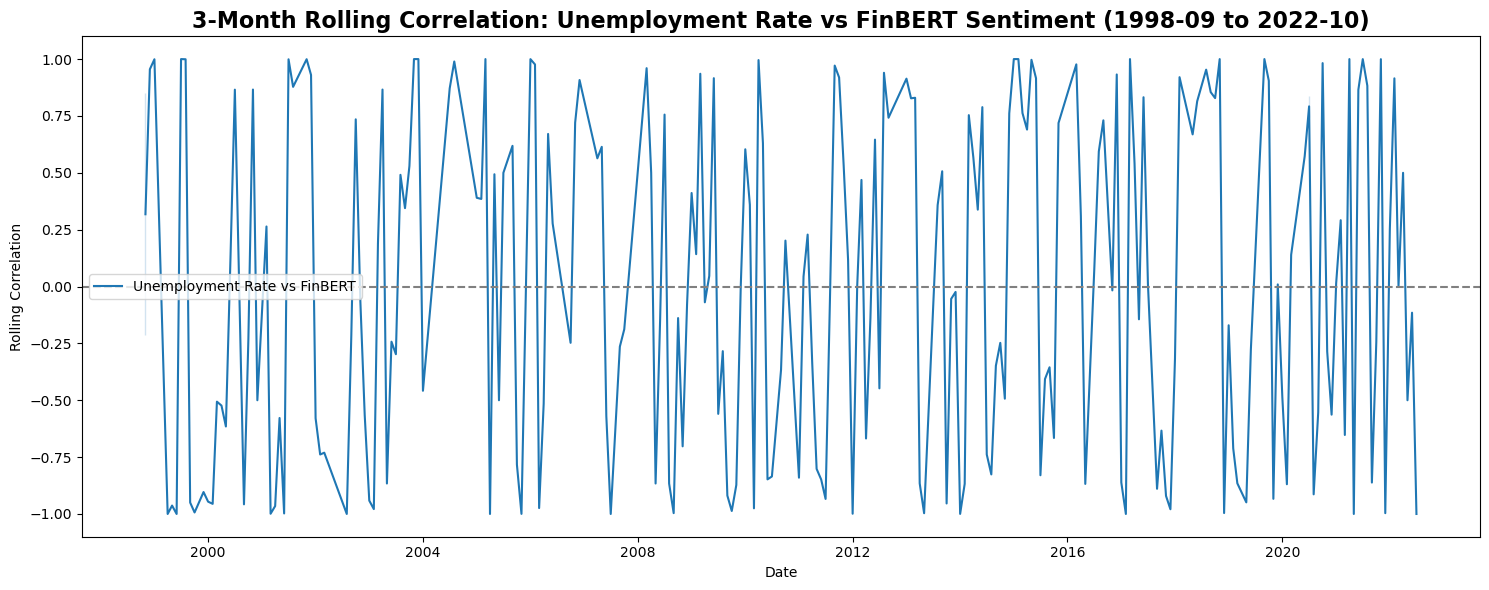

In [93]:
# --- Step 1: Prepare data ---
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment.dropna(subset=['Date'], inplace=True)
merged_sentiment.set_index('Date', inplace=True)
merged_sentiment = merged_sentiment.loc['1998-09-01':'2022-10-01']

# --- Step 2: Select relevant columns ---
unemployment_df = merged_sentiment[['unemployment_rate', 'polarity_score_finbert']].copy()
unemployment_df.interpolate(method='linear', inplace=True)

# --- Step 3: Rolling correlation ---
rolling_corr = unemployment_df.rolling(window=3).corr().reset_index()

# --- Step 4: Filter only correlation with sentiment ---
filtered_corr = rolling_corr[rolling_corr['level_1'] == 'polarity_score_finbert']
filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)

# --- Step 5: Plot ---
plt.figure(figsize=(15, 6))
sns.lineplot(data=filtered_corr, x='Date', y='unemployment_rate', label='Unemployment Rate vs FinBERT')

plt.axhline(0, color='gray', linestyle='--')
plt.title('3-Month Rolling Correlation: Unemployment Rate vs FinBERT Sentiment (1998-09 to 2022-10)', fontsize=16, weight='bold')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\3162672403.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\3162672403.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)


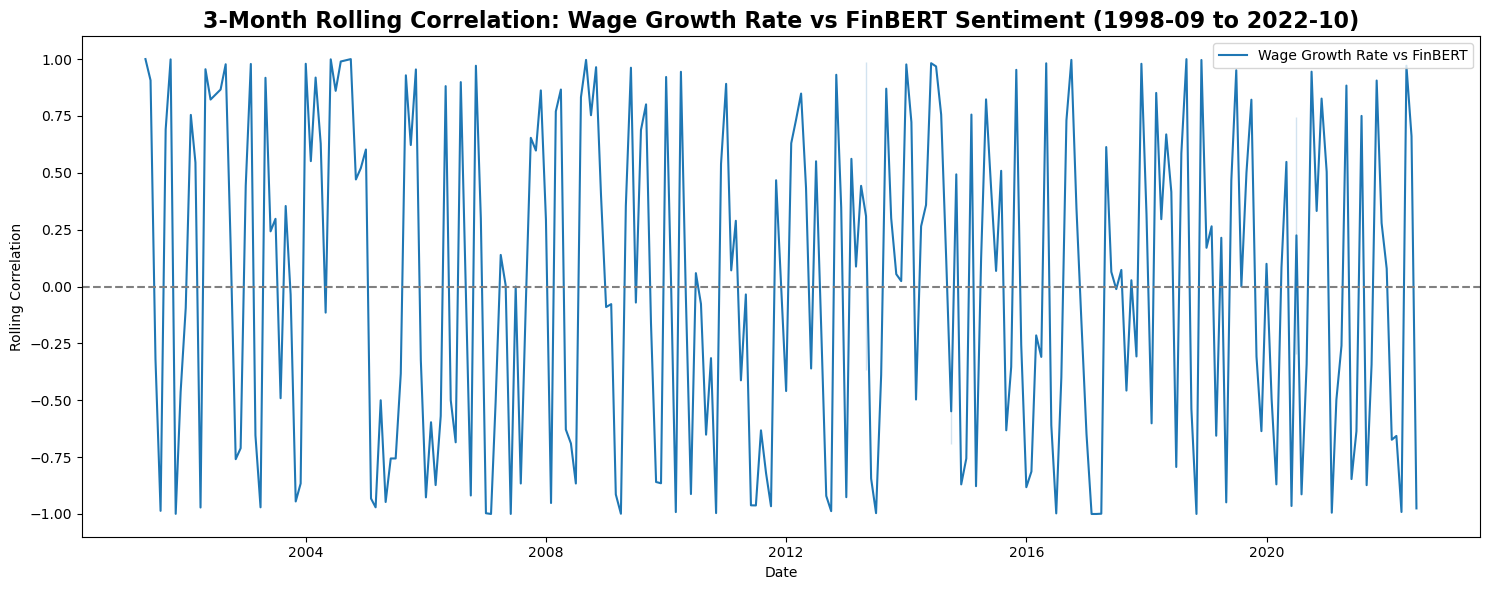

In [97]:
# --- Step 1: Ensure datetime and set index ---
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment.dropna(subset=['Date'], inplace=True)
merged_sentiment.set_index('Date', inplace=True)

# --- Step 2: Filter date range ---
merged_sentiment = merged_sentiment.loc['1998-09-01':'2022-10-01']

# --- Step 3: Select relevant columns ---
wage_df = merged_sentiment[['wage_growth_rate', 'polarity_score_finbert']].copy()
wage_df.interpolate(method='linear', inplace=True)

# --- Step 4: Calculate rolling correlation ---
rolling_corr = wage_df.rolling(window=3).corr().reset_index()

# --- Step 5: Filter for correlation with sentiment ---
filtered_corr = rolling_corr[rolling_corr['level_1'] == 'polarity_score_finbert']
filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)

# --- Step 6: Plot ---
plt.figure(figsize=(15, 6))
sns.lineplot(data=filtered_corr, x='Date', y='wage_growth_rate', label='Wage Growth Rate vs FinBERT')

plt.axhline(0, color='gray', linestyle='--')
plt.title('3-Month Rolling Correlation: Wage Growth Rate vs FinBERT Sentiment (1998-09 to 2022-10)', fontsize=16, weight='bold')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.tight_layout()
plt.show()

C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\1843698077.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\1843698077.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)


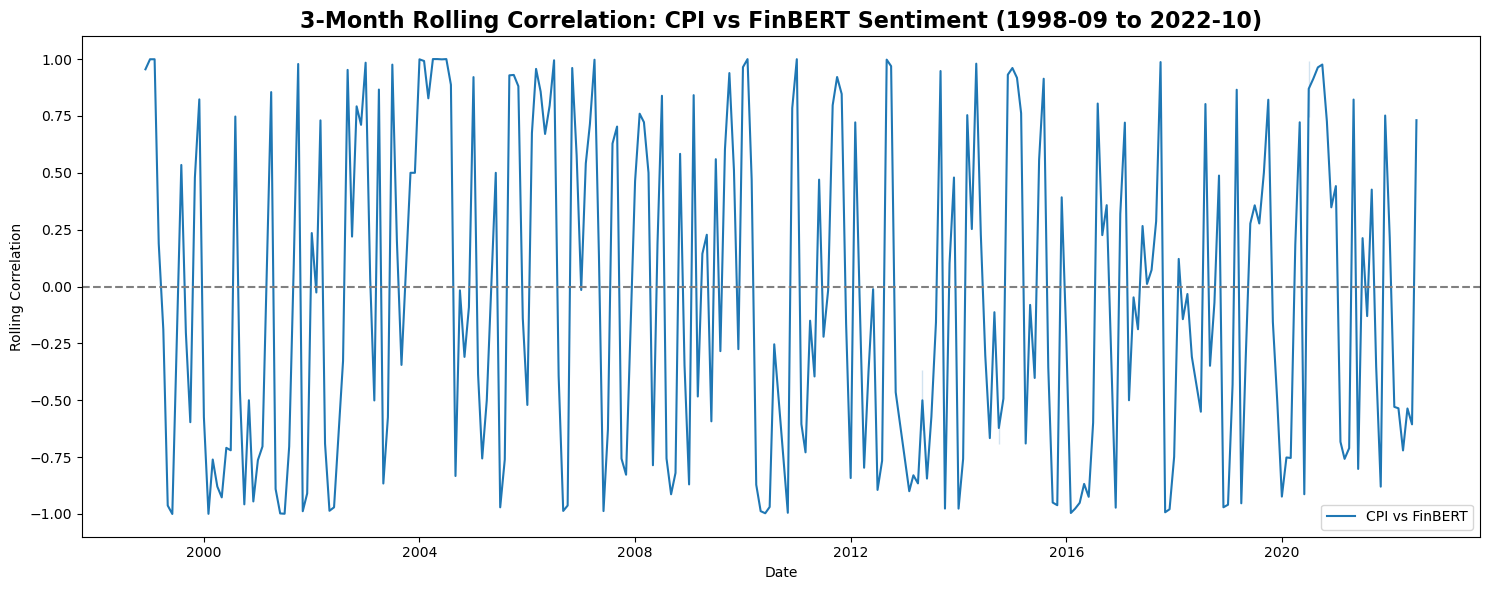

In [101]:
# --- Step 1: Ensure datetime format and set index ---
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment.dropna(subset=['Date'], inplace=True)
merged_sentiment.set_index('Date', inplace=True)

# --- Step 2: Filter to valid date range ---
merged_sentiment = merged_sentiment.loc['1998-09-01':'2022-10-01']

# --- Step 3: Select relevant columns and interpolate missing values ---
cpi_df = merged_sentiment[['CPI', 'polarity_score_finbert']].copy()
cpi_df.interpolate(method='linear', inplace=True)

# --- Step 4: Calculate rolling correlation ---
rolling_corr = cpi_df.rolling(window=3).corr().reset_index()

# --- Step 5: Filter for CPI's correlation with FinBERT ---
filtered_corr = rolling_corr[rolling_corr['level_1'] == 'polarity_score_finbert']
filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)

# --- Step 6: Plot ---
plt.figure(figsize=(15, 6))
sns.lineplot(data=filtered_corr, x='Date', y='CPI', label='CPI vs FinBERT')

plt.axhline(0, color='gray', linestyle='--')
plt.title('3-Month Rolling Correlation: CPI vs FinBERT Sentiment (1998-09 to 2022-10)', fontsize=16, weight='bold')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\4217928384.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
C:\Users\gamze bozkurt omar\AppData\Local\Temp\ipykernel_22244\4217928384.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)


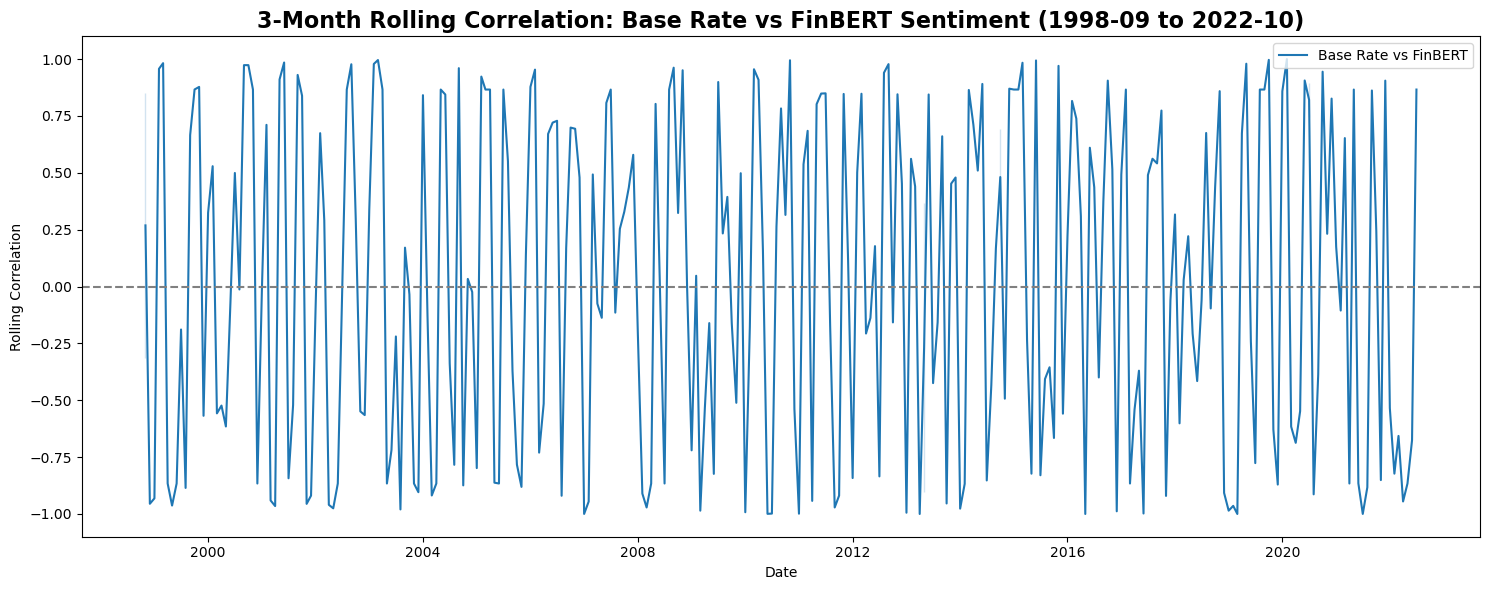

In [105]:
# --- Step 1: Prepare datetime and set index ---
merged_sentiment['Date'] = pd.to_datetime(merged_sentiment['Date'], dayfirst=True, errors='coerce')
merged_sentiment.dropna(subset=['Date'], inplace=True)
merged_sentiment.set_index('Date', inplace=True)

# --- Step 2: Limit to date range of interest ---
merged_sentiment = merged_sentiment.loc['1998-09-01':'2022-10-01']

# --- Step 3: Select relevant columns ---
base_df = merged_sentiment[['base_rate', 'polarity_score_finbert']].copy()

# --- Step 4: Handle missing data ---
base_df.interpolate(method='linear', inplace=True)

# --- Step 5: Calculate rolling correlation ---
rolling_corr = base_df.rolling(window=3).corr().reset_index()

# --- Step 6: Filter for correlation between base_rate and finbert sentiment ---
filtered_corr = rolling_corr[rolling_corr['level_1'] == 'polarity_score_finbert']
filtered_corr.rename(columns={'level_0': 'Date'}, inplace=True)

# --- Step 7: Plot ---
plt.figure(figsize=(15, 6))
sns.lineplot(data=filtered_corr, x='Date', y='base_rate', label='Base Rate vs FinBERT')

plt.axhline(0, color='gray', linestyle='--')
plt.title('3-Month Rolling Correlation: Base Rate vs FinBERT Sentiment (1998-09 to 2022-10)', fontsize=16, weight='bold')
plt.xlabel('Date')
plt.ylabel('Rolling Correlation')
plt.legend()
plt.tight_layout()
plt.show()